# Gaining a Competitive Edge in a Regulated Market: Data-Driven Strategies to Optimize Short-Term and Long-Term Airbnb Listings in Bangkok
By: Mizan Hakim

## Business Context

### Background

The short-term and long-term rental market in Bangkok has been growing rapidly alongside the increasing use of digital platforms like Airbnb. The city offers a wide range of accommodations, from apartment units to private houses, each with distinct characteristics depending on the neighborhood.

However, Bangkok’s rental market has unique dynamics. According to legal frameworks such as the Hotel Act and the Condominium Act, not all property owners are permitted to rent their units for short-term stays. This creates a natural separation between two main rental categories: short-term rentals (less than 30 nights) and long-term rentals (30 nights or more).

While these regulations provide important context for the market, this analysis does not focus on the legal implications directly. The main objective of this study is to understand performance patterns and market strategies for both rental categories through publicly available Airbnb data in Bangkok.

By analyzing variables such as rental price (price), minimum nights (minimum_nights), language and keyword usage in listing titles (name), and engagement indicators like number of reviews (number_of_reviews), the study aims to:

* Identify differences in pricing patterns and guest engagement between short-term and long-term rentals,

* Assess the impact of language and keyword usage on listing performance, and

* Determine the “sweet spot” for minimum nights that correlates with optimal review performance.

The results are expected to provide data-driven insights that help Bangkok hosts optimize their listing strategies, for both short-term and long-term rentals, within a regulated and competitive market environment.


### Problem Statements

How can Airbnb hosts optimize their listing performance—whether through short-term rentals that comply with regulatory requirements or long-term rentals driven by market focus or regulatory constraints? This study seeks to explore how Airbnb can leverage data analysis to assist hosts of both short-term and long-term listings in developing effective strategies to enhance their performance. Understanding these dynamics is essential for enabling hosts to make data-driven decisions, improve operational efficiency, and sustain competitiveness in Bangkok’s rapidly evolving rental market.

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Data Understanding

In this process we will take a quicklook at the condition of the Dataset and also identifying if there are missing values, duplications, anomalies, or outliers in the dataset. We will also check each of the numerical colum data distribution type, is it normal, left skewed, or right skewed.

This dataset can be accessed [in here](https://drive.google.com/file/d/1nCvedfr9cM8wWlv_wdAi4XFlkzH533Mv/view?usp=sharing), with 16 columns that contain the following names and descriptions:

1. id: Airbnb's unique identifier for the listing.
2. name: Name of the listing.
3. host_id: Airbnb's unique identifier for the host/user.
4. host_name: Name of the host. Usually, just the first name(s).
5. neighbourhood: The neighbourhood is geocoded using the latitude and longitude against neighbourhoods as defined by open or public digital shapefiles.
6. latitude: Uses the World Geodetic System (WGS84) projection for latitude and longitude.
7. longitude: Uses the World Geodetic System (WGS84) projection for latitude and longitude.
8. room_type: [Entire home/apt |Private room| Shared room| Hotel]
9. price: Daily price in local currency. Note, the $ sign may be used despite the locale.
10. minimum_nights: The minimum number of night stays for the listing.
11. number_of_reviews: The number of reviews the listing has.
12. last_review: The date of the last/newest review.
13. reviews_per_month: Average of reviews a listing received per month.
14. calculated_host_listings_count: The number of listings the host has in the current scrape in the city/region geography.
15. availability_365: The availability of the listing in the next 365 days. Note a listing may be unavailable because it has been booked by a guest or blocked by the host.
16. number_of_reviews_ltm: The number of reviews the listing has (in the last 12 months).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, skew, chi2_contingency, mannwhitneyu, ttest_ind
from IPython.display import display
import re
import string

import warnings
warnings.filterwarnings("ignore")

df=pd.read_csv(r"C:\Users\mizan\Desktop\Purwadhika\CAPSTONE PROJECT 3\Airbnb Listings Bangkok.csv")

### 1. Dataset Quicklook

Here are the top and bottom 50 rows from the airbnb_listings_bangkok dataset:

In [2]:
display(df.head(),df.tail())

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0


,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
15849,15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0
15853,15853,790476492384199044,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.752960,100.540820,Private room,1214,1,0,NaN,NaN,14,365,0


In [3]:
df.shape

print('Number of rows: ', df.shape[0])
print('Number of columns: ', df.shape[1])

Number of rows:  15854
Number of columns:  17


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      15854 non-null  int64  
 1   id                              15854 non-null  int64  
 2   name                            15846 non-null  object 
 3   host_id                         15854 non-null  int64  
 4   host_name                       15853 non-null  object 
 5   neighbourhood                   15854 non-null  object 
 6   latitude                        15854 non-null  float64
 7   longitude                       15854 non-null  float64
 8   room_type                       15854 non-null  object 
 9   price                           15854 non-null  int64  
 10  minimum_nights                  15854 non-null  int64  
 11  number_of_reviews               15854 non-null  int64  
 12  last_review                     

In [5]:
display(df.describe(), df.describe(include='object'))

,Unnamed: 0,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,15854.000000,1.585400e+04,1.585400e+04,15854.000000,15854.000000,1.585400e+04,15854.000000,15854.000000,10064.000000,15854.000000,15854.000000,15854.000000
mean,7926.500000,1.579397e+17,1.541058e+08,13.745144,100.559903,3.217704e+03,15.292355,16.654157,0.813145,13.889618,244.378643,3.481519
std,4576.799919,2.946015e+17,1.318726e+08,0.043040,0.050911,2.497212e+04,50.815020,40.613331,1.090196,30.269848,125.843224,8.916937
min,0.000000,2.793400e+04,5.892000e+04,13.527300,100.329550,0.000000e+00,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,3963.250000,2.104509e+07,3.974431e+07,13.720090,100.529690,9.000000e+02,1.000000,0.000000,0.120000,1.000000,138.000000,0.000000
50%,7926.500000,3.503734e+07,1.224556e+08,13.738490,100.561415,1.429000e+03,1.000000,2.000000,0.435000,4.000000,309.000000,0.000000
75%,11889.750000,5.256154e+07,2.390547e+08,13.759497,100.585150,2.429000e+03,7.000000,13.000000,1.060000,13.000000,360.000000,3.000000
max,15853.000000,7.908162e+17,4.926659e+08,13.953540,100.923440,1.100000e+06,1125.000000,1224.000000,19.130000,228.000000,365.000000,325.000000


,name,host_name,neighbourhood,room_type,last_review
count,15846,15853,15854,15854,10064
unique,14794,5312,50,4,1669
top,New! La Chada Night Market studio 2PPL near MRT,Curry,Vadhana,Entire home/apt,2022-12-11
freq,45,228,2153,8912,189


In [6]:
columns = df.columns
total_unique = [len(df[col].unique()) for col in df.columns]
unique = [df[col].unique() for col in df.columns]

summary_desciption = pd.DataFrame({
    'column': columns ,
    'total_unique_value': total_unique,
    'unique_value_list': unique
})

summary_desciption

,column,total_unique_value,unique_value_list
0,Unnamed: 0,15854,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1,id,15854,"[27934, 27979, 28745, 35780, 941865, 1704776, ..."
2,name,14795,"[Nice room with superb city view, Easy going l..."
3,host_id,6659,"[120437, 120541, 123784, 153730, 610315, 21296..."
4,host_name,5313,"[Nuttee, Emy, Familyroom, Sirilak, Kasem, Wimo..."
5,neighbourhood,50,"[Ratchathewi, Bang Na, Bang Kapi, Din Daeng, B..."
6,latitude,9606,"[13.75983, 13.66818, 13.75232, 13.78823, 13.76..."
7,longitude,10224,"[100.54134, 100.61674, 100.62402, 100.57256, 1..."
8,room_type,4,"[Entire home/apt, Private room, Hotel room, Sh..."
9,price,3040,"[1905, 1316, 800, 1286, 1000, 1558, 1461, 700,..."


**INITIAL FINDINGS:**

* The dataset airbnb_listings_bangkok contains 17 columns and 15,854 rows.
* There is a column with an incorrect datatype: the last_review column. Its data type should be datetime.
* Some columns are not needed for this analysis and will be dropped, such as the unnamed: 0 column.

##

### 2. Identifying Data Anomalies

In this section we will identify if there are any anomalies such as typos, misclassifications, or data input that doesn't make sense when put into context. This will give us a good reason if we want to impute, drop, or in some cases just leave it alone in data cleaning process.

#### 2.1 'price'

From the previous quick look, we identified two anomalies in the dataset through the .describe() function. First one is in the 'price' column, where the minimum value is 0, which is unreasonable because when we want to set a listing price on Airbnb, the value must be greater than 0. 

#### 2.2 'name'

In [7]:
df['name'].head(50)

0                       Nice room with superb city view
1                        Easy going landlord,easy place
2                     modern-style apartment in Bangkok
3        Spacious one bedroom at The Kris Condo Bldg. 3
4                            Suite Room 3 at MetroPoint
5                        NEw Pro!!  Bungalow Bkk Centre
6                       Condo with Chaopraya River View
7                       1 chic bedroom apartment in BKK
8                    Batcave, Pool view, near Chatuchak
9                         Standard Room Decor do Hostel
10                        Sathorn Terrace Apartment(61)
11                       2BR apt in a cozy neighborhood
12         Comfy bedroom near River pier & BTS  Taksin.
13                     budget hotel bangkok near subway
14                   Deluxe Condo, Nana, Pool/GYM/Sauna
15                   Luxury@swimpool/FreeWiFi/nearJJMkt
16                  Nice and Quiet condo near BTS Onnut
17                     24Flr- 1br Apt near JJ, M

In [8]:
df['name'].unique()

array(['Nice room with superb city view',
       'Easy going landlord,easy place',
       'modern-style apartment in Bangkok', ...,
       'Sukhumvit Condo Next to BTS',
       '1 Bed for 1 person Close to Chatuchak market BTS',
       '素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街'], dtype=object)

**KEY FINDINGS:** In the 'name' column, we can identify several names that don't use english language, but we won't change this because we can compare the popularity of listings with English names and those without. We will do this by creating a new column that can identify if the listing name is written in english or not. On the other hand, we also found emoji characters like '☞✪✪✪✪', we will remove all these characters.

#### 2.3 'neighbourhood'

In [9]:
df['neighbourhood'].unique()

array(['Ratchathewi', 'Bang Na', 'Bang Kapi', 'Din Daeng',
       'Bang Kho laen', 'Rat Burana', 'Chatu Chak', 'Khlong San',
       'Bang Rak', 'Phaya Thai', 'Sathon', 'Khlong Toei', 'Vadhana',
       'Sai Mai', 'Lat Krabang', 'Bangkok Yai', 'Wang Thong Lang',
       'Huai Khwang', 'Phasi Charoen', 'Bang Sue', 'Nong Chok',
       'Phra Khanong', 'Thawi Watthana', 'Parthum Wan', 'Pra Wet',
       'Phra Nakhon', 'Thon buri', 'Yan na wa', 'Suanluang', 'Don Mueang',
       'Dusit', 'Lak Si', 'Samphanthawong', 'Bueng Kum', 'Bang Phlat',
       'Saphan Sung', 'Min Buri', 'Khan Na Yao', 'Khlong Sam Wa',
       'Bang Khen', 'Lat Phrao', 'Chom Thong', 'Bangkok Noi',
       'Pom Prap Sattru Phai', 'Nong Khaem', 'Thung khru', 'Bang Khae',
       'Bang Khun thain', 'Taling Chan', 'Bang Bon'], dtype=object)

**KEY FINDINGS:** In the 'neighbourhood' column, we can identify several mispelled names like 'Parthum Wan' with the correct one is 'Pathum Wan'. Although the impact is minor, we will correct these to ensure consistency and avoid potential issues when joining with other datasets in the future.

#### 2.4 'latitude' & 'longitude'

We will verify whether any identical coordinates (latitude and longitude) are associated with different neighbourhood names, which could indicate misclassification or data inconsistencies.

In [10]:
df[['latitude', 'longitude']].drop_duplicates().shape[0]

15272

In [11]:
anomaly_detail = (
    df.groupby(['latitude', 'longitude'])['neighbourhood']
      .unique()
      .reset_index(name='neighbourhood_list')
)

anomaly_detail = anomaly_detail[anomaly_detail['neighbourhood_list'].apply(len) > 1]

anomaly_detail.head()

,latitude,longitude,neighbourhood_list


**KEY FINDINGS:** The result shows that although many listings have the same latitude and longitude, no listings were found that have the same latitude and longitude with different neighbourhood names. This is good because it can also be suggested that the two columns are consistent and there are no anomalies in them.

##

### 3. Identifying Missing Values

In this section we will identify if there are any missing values in our dataset. This will help us know that if the missing proportion is big enough for us to be concerned if we drop it or not.

In [12]:
missing_value = df.isna().sum()
missing_value_percentage = (missing_value/len(df))*100

missing_value_desciption = pd.DataFrame({
    'missing_value': missing_value,
    'missing_value_percentage': missing_value_percentage.round(2),
})

missing_value_desciption

,missing_value,missing_value_percentage
Unnamed: 0,0,0.00
id,0,0.00
name,8,0.05
host_id,0,0.00
host_name,1,0.01
neighbourhood,0,0.00
latitude,0,0.00
longitude,0,0.00
room_type,0,0.00
price,0,0.00


<Axes: >

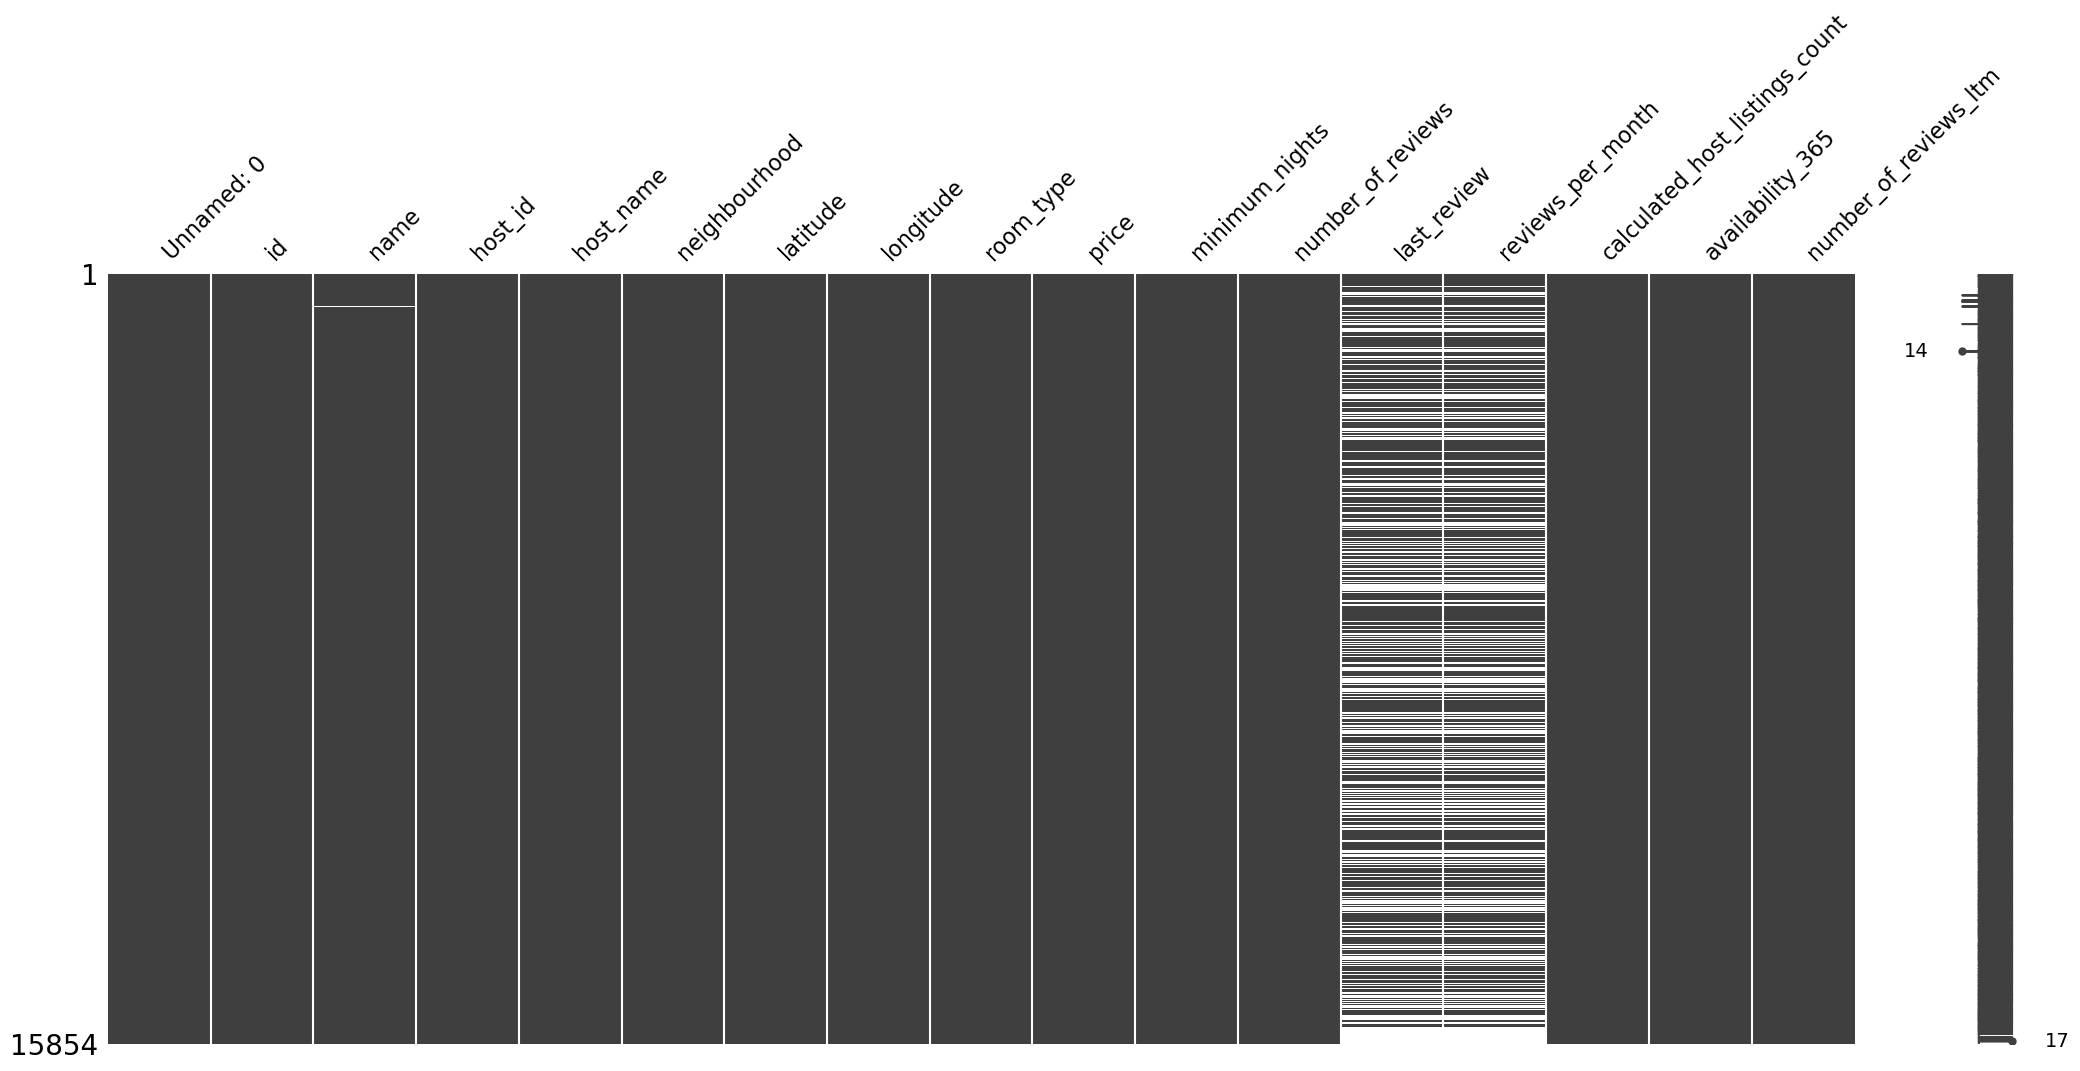

In [13]:
import missingno

missingno.matrix(df)

**KEY FINDINGS:**
* There are 4 columns with missing values in the dataset: name, host_name, last_review, and reviews_per_month.
* The name and host_name columns have a very small proportion of missing values, below 1%, which can be considered negligible.
* The last_review and reviews_per_month columns have a relatively high proportion of missing values, around 35%, with the same number of missing entries. This indicates that the missingness in these columns is likely Missing Not At Random (MNAR), most probably occurring for listings with zero reviews.

##

### 4. Identifying Data Duplication

In this section we will check and see if our dataset have a duplication problem.

In [14]:
duplicates = df.duplicated().sum()
duplicates

np.int64(0)

**KEY FINDINGS:**
Our dataset does not have a duplication problem.

##

### 5. Identifying Outlier

In this section, kita ingin mengetahui apakah kolom-kolom pada dataset ini memiliki outlier? jika iya seberapa banyak dan apakah hal tersebut adalah hal yang wajar.

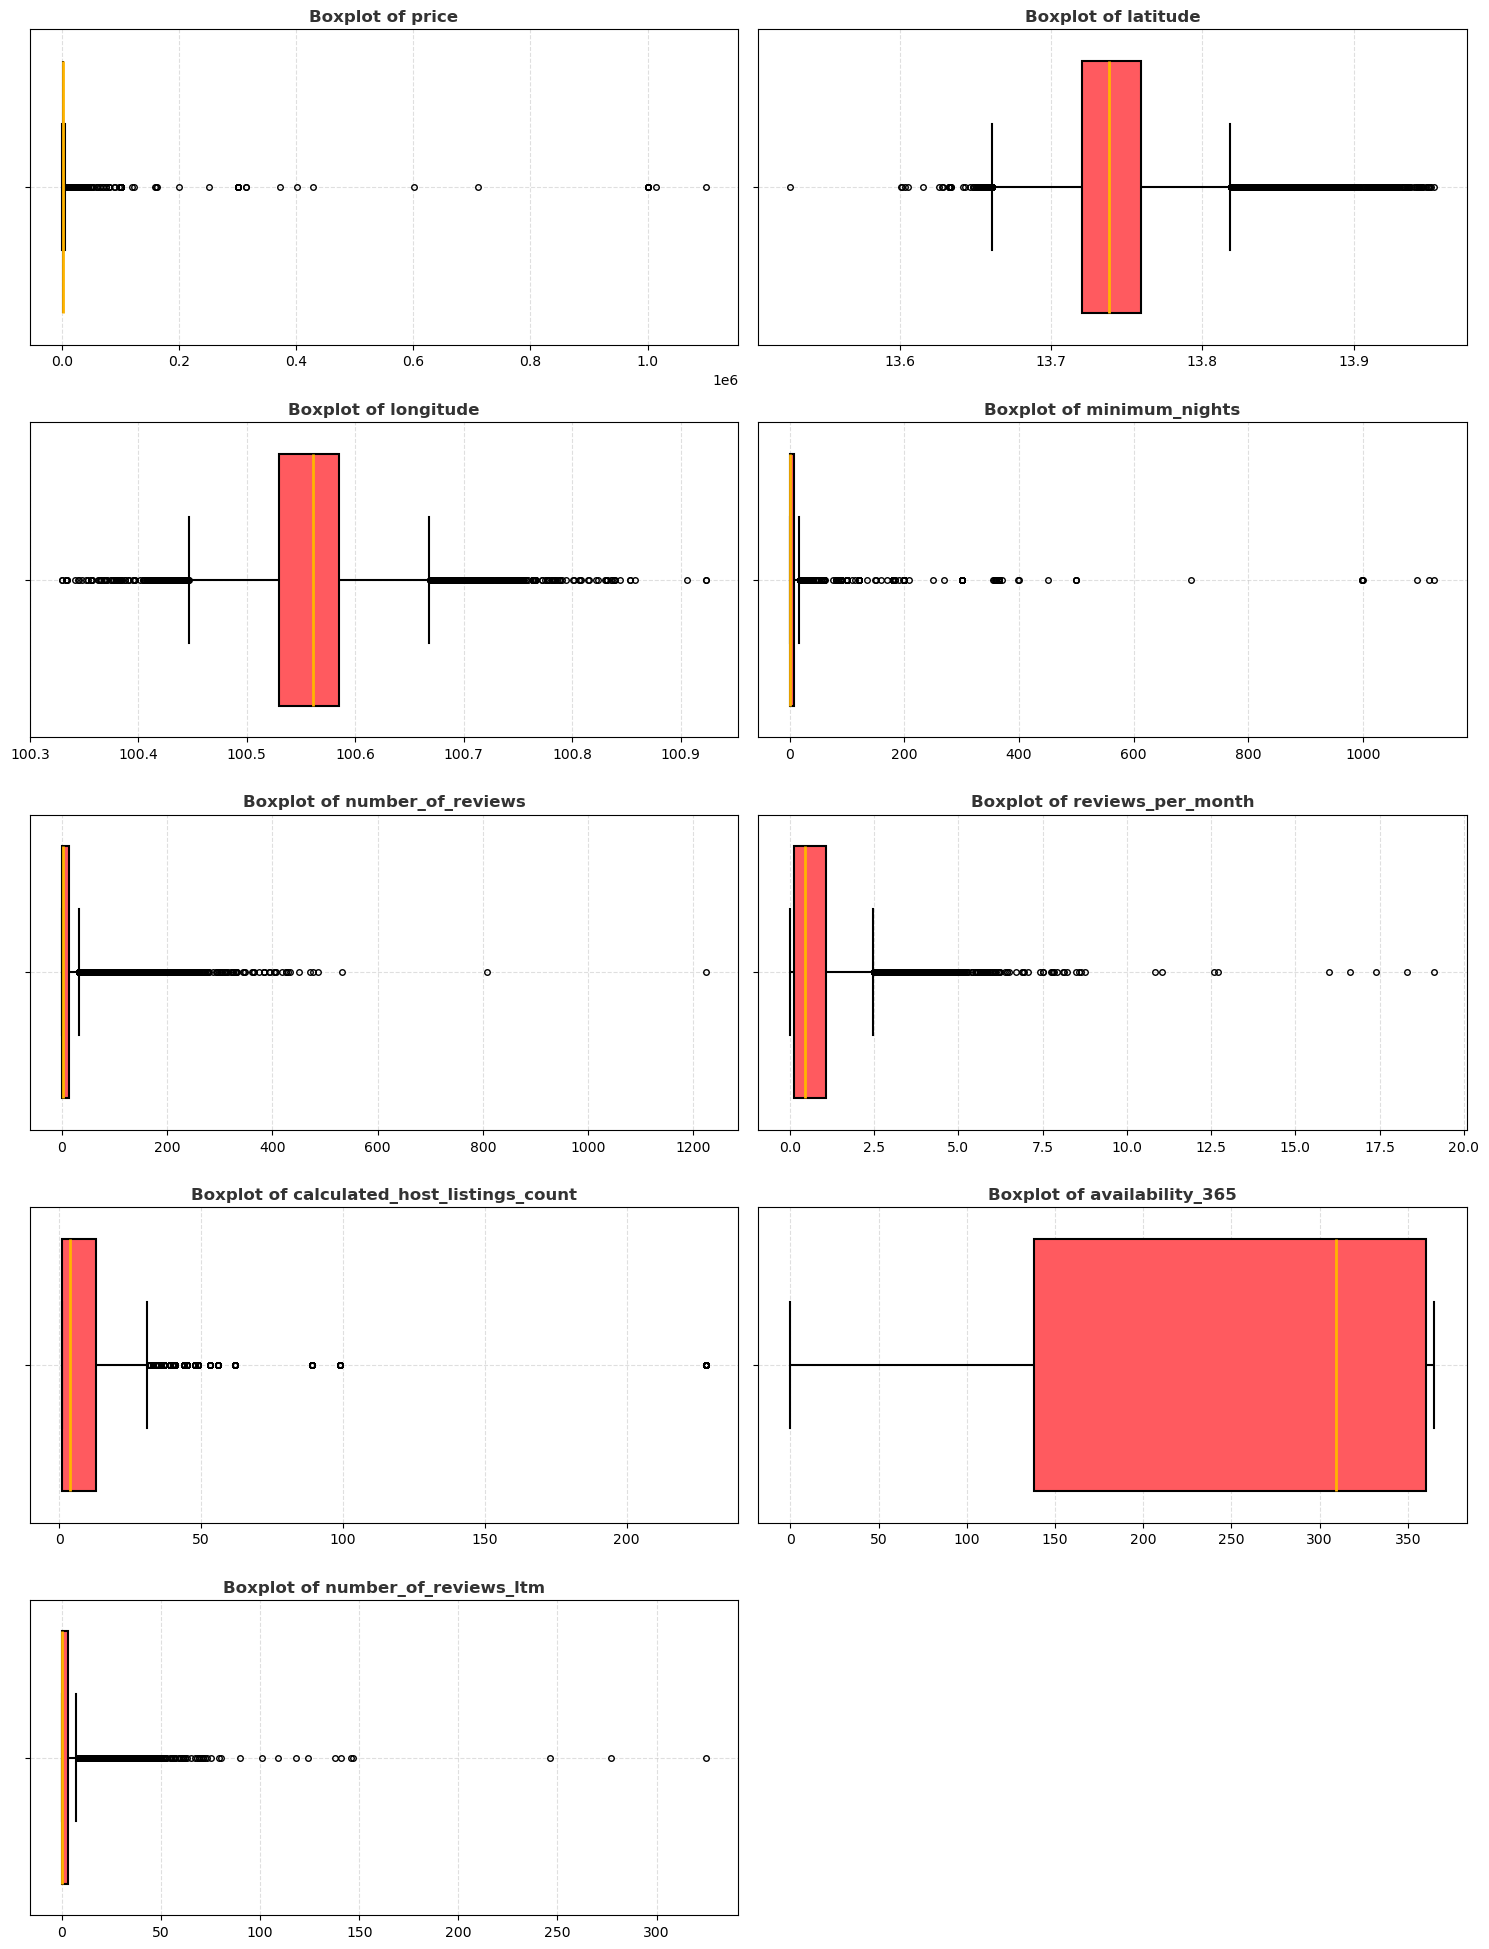

In [15]:
# Kolom yang ingin divisualisasikan
cols = [
    'price', 'latitude', 'longitude', 'minimum_nights',
    'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365',
    'number_of_reviews_ltm'
]

# Boxplot
plt.figure(figsize=(15, 20))

for i, col in enumerate(cols, 1):
    plt.subplot(5, 2, i)
    sns.boxplot(
        x=df[col],
        linewidth=1.5,
        fliersize=4,
        boxprops=dict(facecolor='#FF5A5F', edgecolor='black'),             
        whiskerprops=dict(color='black', linewidth=1.5),                   
        capprops=dict(color='black', linewidth=1.5),                       
        medianprops=dict(color='#FFB400', linewidth=2),                   
        flierprops=dict(marker='o', color='black', markersize=4, 
                        markeredgecolor='black')                          
    )
    plt.title(f'Boxplot of {col}', fontsize=12, fontweight='bold', color='#333333')
    plt.xlabel('')
    plt.grid(True, linestyle='--', alpha=0.4)

plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

In [16]:
# Untuk menampung hasil
summary_data = []

# Looping setiap kolom numerical
for col in cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_count = outliers.shape[0]
    total_count = df[col].count()
    outlier_pct = (outlier_count / total_count) * 100

    summary_data.append({
        'Column': col,
        'Q1': round(q1, 2),
        'Q3': round(q3, 2),
        'Outlier Count': outlier_count,
        'Total Count': total_count,
        'Outlier Proportion (% of Total Count)': round(outlier_pct, 2)
    })

summary_df = pd.DataFrame(summary_data)
summary_df

,Column,Q1,Q3,Outlier Count,Total Count,Outlier Proportion (% of Total Count)
0,price,900.00,2429.00,1403,15854,8.85
1,latitude,13.72,13.76,1095,15854,6.91
2,longitude,100.53,100.59,602,15854,3.80
3,minimum_nights,1.00,7.00,3168,15854,19.98
4,number_of_reviews,0.00,13.00,2240,15854,14.13
5,reviews_per_month,0.12,1.06,693,10064,6.89
6,calculated_host_listings_count,1.00,13.00,1832,15854,11.56
7,availability_365,138.00,360.00,0,15854,0.00
8,number_of_reviews_ltm,0.00,3.00,2219,15854,14.00


**KEY FINDINGS:**

Most numerical columns in this dataset have an outlier proportion above 5%. The columns with the highest outlier proportions are:

minimum_nights at 19.98%

Followed by number_of_reviews (14.13%), number_of_reviews_ltm (14.00%), and calculated_host_listings_count (11.56%)

The price column also has a notable outlier proportion of 8.85%, while latitude and reviews_per_month have outlier proportions of approximately 6.91% and 6.89%, respectively.

In contrast, availability_365 has no outliers, indicating a relatively stable distribution.

The presence of outliers in these columns is generally due to extreme variations in rental behavior and host pricing strategies. For example, in the price column, outliers likely arise from luxury or exclusive properties priced far above the market average. Outliers in minimum_nights may originate from listings intended for long-term rentals or data entry errors. Similarly, extreme values in number_of_reviews and calculated_host_listings_count reflect highly active hosts or those with many properties, which do not represent the majority of Airbnb users.

##

### 6. Identifying Data Distribution

We will examine the data distribution of each column to serve as a foundation for future inferential analysis and to determine whether the mean or median is more appropriate when imputing missing values using averages.

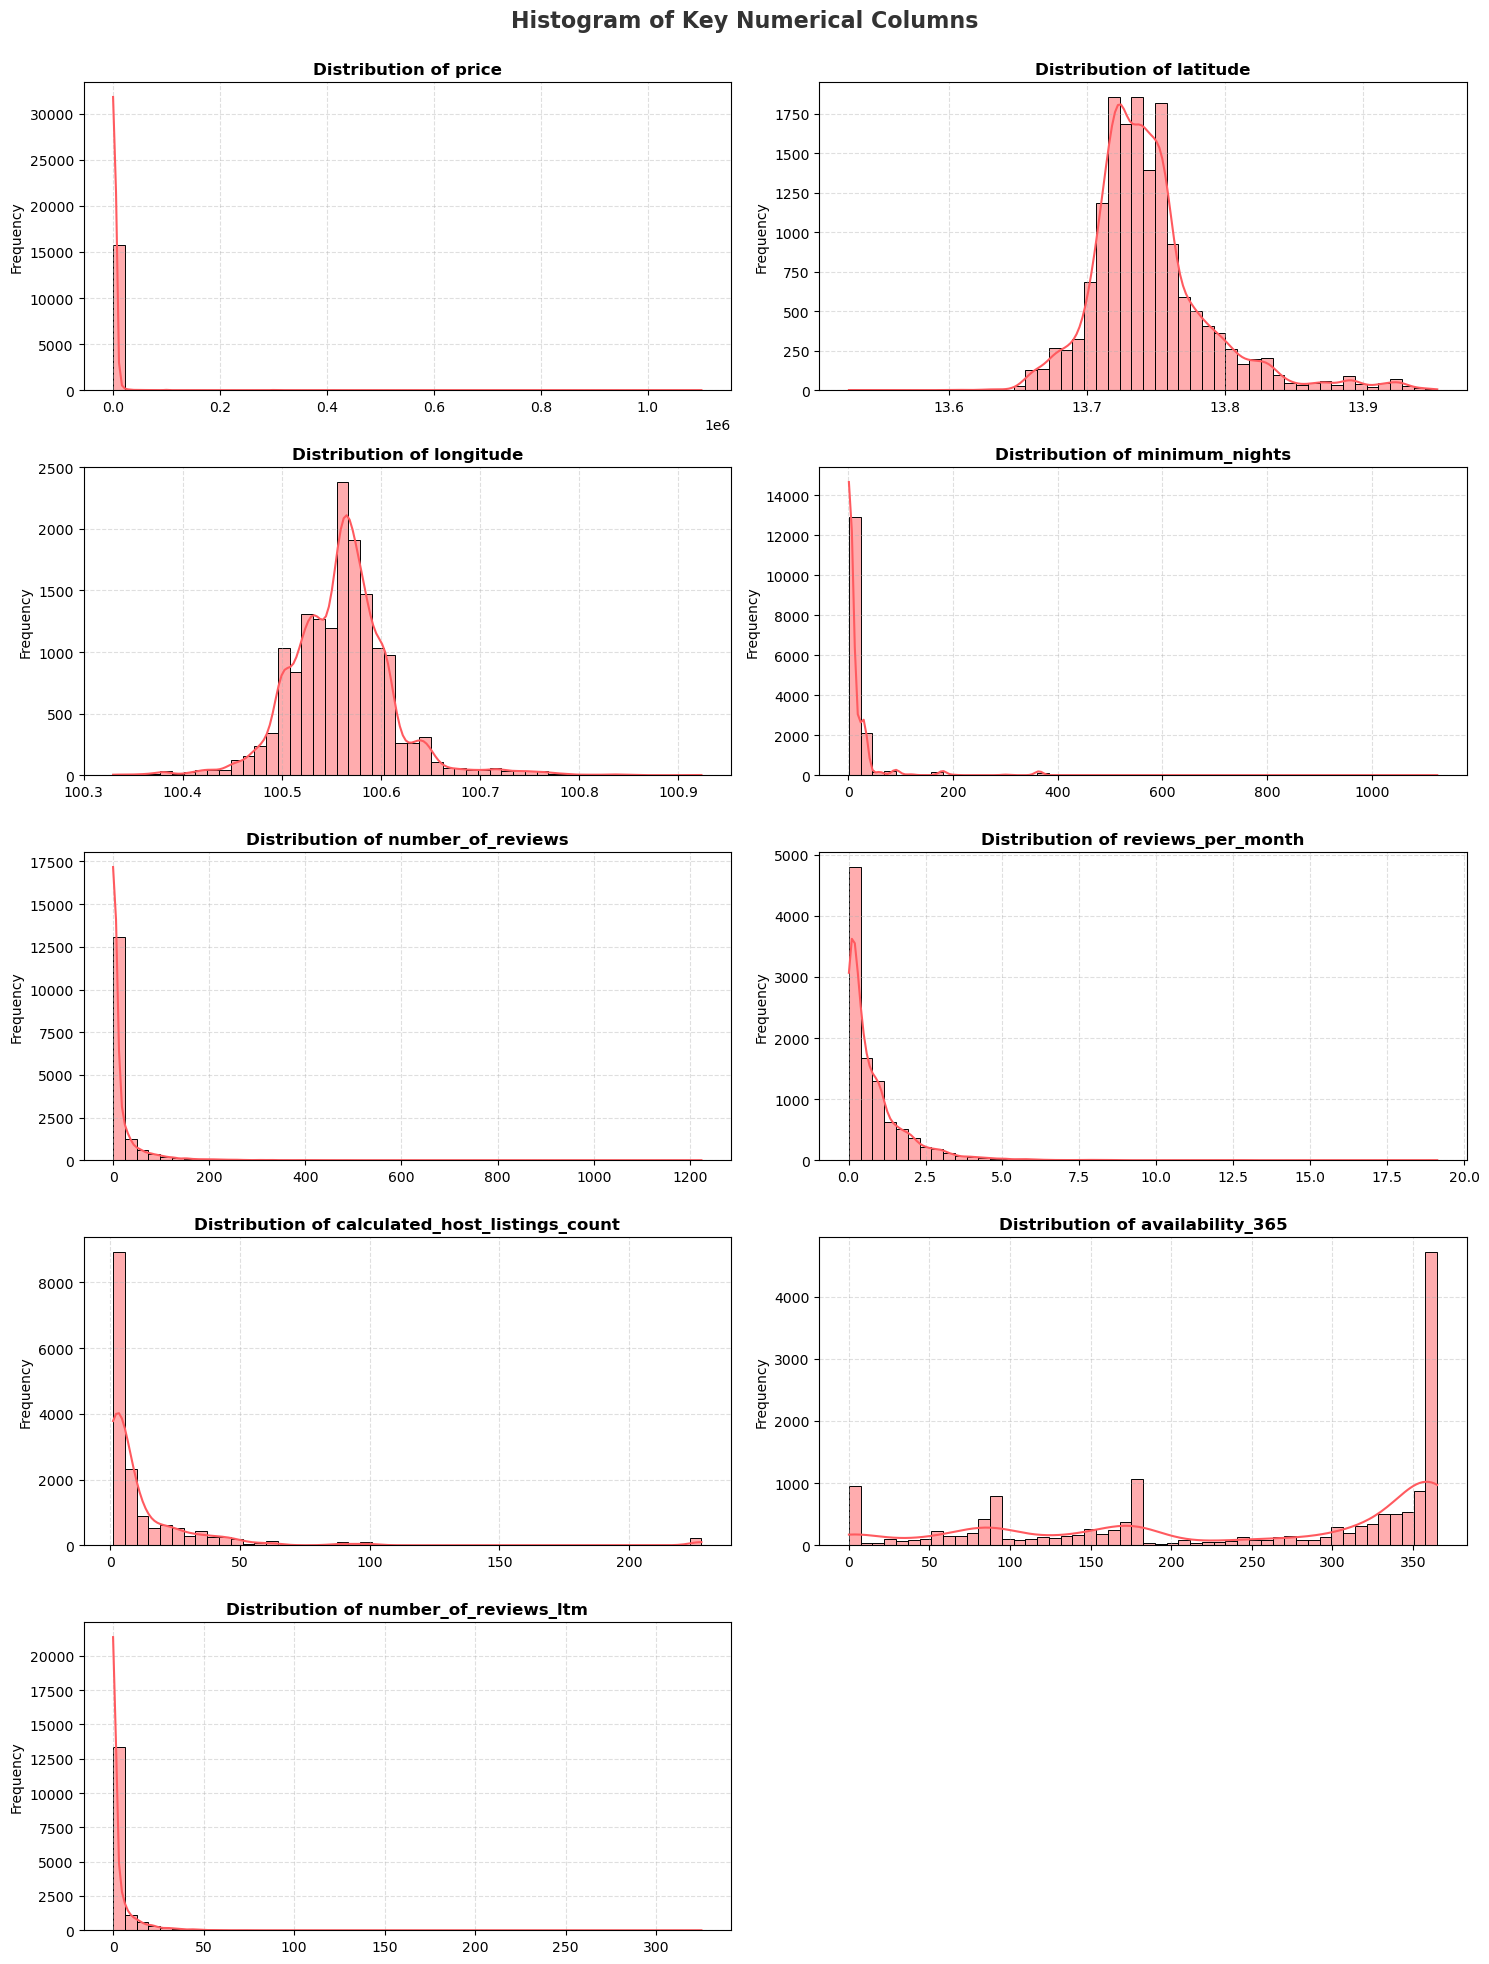

In [17]:
# Ukuran figure
plt.figure(figsize=(15, 20))

# Plot histogram untuk setiap kolom
for i, col in enumerate(cols, 1):
    plt.subplot(5, 2, i)
    sns.histplot(
        data=df,
        x=col,
        bins=50,
        kde=True,               # Tambahkan kurva KDE untuk melihat bentuk distribusi
        color='#FF5A5F',
        edgecolor='black'
    )
    plt.title(f'Distribution of {col}', fontsize=12, fontweight='bold')
    plt.xlabel('')
    plt.ylabel('Frequency')
    plt.grid(True, linestyle='--', alpha=0.4)

# Tambahkan judul keseluruhan
plt.suptitle('Histogram of Key Numerical Columns', fontsize=16, fontweight='bold', color='#333333')
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

In [18]:
# Untuk menampung hasilnya
results = []

for col in cols:
    data = df[col].dropna()

    if len(data) >= 20:
        stat, p = normaltest(data)
        skew_val = skew(data)

        # Tentukan arah skew 
        if skew_val > 0.5:
            skew_type = 'Right-skewed'
        elif skew_val < -0.5:
            skew_type = 'Left-skewed'
        else:
            skew_type = 'Approximately normal'

        results.append({
            'Column': col,
            'Statistic': round(stat, 4),
            'p-value': round(p, 5),
            'Normally Distributed': p > 0.05,
            'Skew Type': skew_type
        })
    else:
        results.append({
            'Column': col,
            'Statistic': None,
            'p-value': None,
            'Normally Distributed': 'Not enough data',
            'Skew Type': 'N/A'
        })

# Buat DataFrame hasilnya
normality_skewtype_df = pd.DataFrame(results)

# Tampilkan secara rapi di Jupyter Notebook
display(normality_skewtype_df)

,Column,Statistic,p-value,Normally Distributed,Skew Type
0,price,43049.9444,0.0,False,Right-skewed
1,latitude,4357.5846,0.0,False,Right-skewed
2,longitude,2077.6978,0.0,False,Right-skewed
3,minimum_nights,22191.9210,0.0,False,Right-skewed
4,number_of_reviews,19164.7064,0.0,False,Right-skewed
5,reviews_per_month,9084.2677,0.0,False,Right-skewed
6,calculated_host_listings_count,16475.8870,0.0,False,Right-skewed
7,availability_365,12899.8943,0.0,False,Left-skewed
8,number_of_reviews_ltm,24897.5872,0.0,False,Right-skewed


**KEY FINDINGS:**
* None of the numerical columns in this dataset have a normal data distribution.

* The columns price, minimum_nights, number_of_reviews, reviews_per_month, calculated_host_listings_count, and number_of_reviews_ltm are right-skewed.

* One column, availability_365, has a left-skewed distribution, indicating that most listings have high availability (close to 365 days per year).

* latitude and longitude appear approximately normal visually, but validation with the D’Agostino and Pearson’s Test shows that both columns are actually not normally distributed, specifically right-skewed.

* High skewness in variables such as price and minimum_nights indicates the presence of potential extreme values. These distributions will be examined further during the data cleaning and analysis process.

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Data Cleaning

In this process, we will perform data cleaning and then save the cleaned dataset as a new file. The tasks to be carried out are as follows:

1. Handling Missing Value
2. Handling Anomalies
3. Handling Irrelevant Columns

### 1. Handling Missing Value

#### 1.1 'name'

In [19]:
df[df['name'].isna()]

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
439,439,4549768,NaN,18852579,Titawan,Phra Khanong,13.69406,100.59619,Private room,1080,5,0,NaN,NaN,1,365,0
544,544,4720818,NaN,24386225,Cherry,Din Daeng,13.77562,100.57346,Private room,1200,1,0,NaN,NaN,1,365,0
572,572,4245018,NaN,22030043,Parichart,Bang Phlat,13.78376,100.49821,Private room,1200,1,0,NaN,NaN,1,365,0
669,669,6148415,NaN,31895202,Chira,Bang Na,13.68276,100.60894,Entire home/apt,2424,2,0,NaN,NaN,1,365,0
1030,1030,8055144,NaN,42521288,Nantida,Vadhana,13.74126,100.55761,Private room,5000,3,0,NaN,NaN,1,365,0
1282,1282,10000742,NaN,51374914,Diamond Bangkok,Ratchathewi,13.75328,100.52928,Private room,930,1,6,2017-05-13,0.07,1,365,0
1594,1594,10710165,NaN,55347997,Khaneungnit,Vadhana,13.71757,100.60464,Private room,1000,1,0,NaN,NaN,1,365,0
2075,2075,13142743,NaN,73275200,Pakaphol,Khlong Toei,13.72566,100.56416,Private room,850,1,2,2017-12-11,0.03,3,220,0


In [20]:
df['name'] = df['name'].fillna('Unknown')
df['name'].isna().sum()

np.int64(0)

**Missing Value Treatment:** To handle the missing values in the name column, which are very few (8 rows), we will retain these rows and label them as 'unknown'. This approach is taken because the other columns in these rows contain valid data that can still be analyzed. However, when performing the English vs. Non-English category analysis on listing popularity, we will drop these 8 rows to maintain data validity as much as possible. Since listing names can be highly random, filling the missing values with 'unknown' is appropriate.

#### 1.2 'host_name'

In [21]:
# Ambil semua host_id yang host_name-nya NaN
missing_host_name = df[df['host_name'].isna()]['host_id'].unique()

# Cek host_id dari host_name yang memiliki missing value, apakah ada di baris lain yang host_name-nya tidak kosong
matched = df[
    (df['host_id'].isin(missing_host_name)) &
    (df['host_name'].notna())
]

matched

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm


In [22]:
df[df['host_name'].isna()]

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
3571,3571,19682464,Cozy Hideaway,137488762,NaN,Bang Kapi,13.76999,100.63769,Private room,1399,3,1,2017-07-29,0.02,1,365,0


In [23]:
df['host_name'] = df['host_name'].fillna('unknown')
df['host_name'].isna().sum()

np.int64(0)

**Missing Value Treatment:** To handle the missing value in the host_name column, which occurs in only 1 row, we will retain it and label it as 'unknown'. This is because the other columns in this row contain valid data that can still be analyzed. Since the missing host_name corresponds to a single host_id, filling it with 'unknown' is appropriate due to its randomness.

#### 1.3 'last_review'

In [24]:
# 1. Lihat total missing value di last_review
missing_last_review = df['last_review'].isna().sum()

# 2. Lihat berapa baris dengan missing last_review DAN number_of_reviews = 0
missing_with_zero_reviews = df[(df['last_review'].isna()) & (df['number_of_reviews'] == 0)].shape[0]

# 3. Bandingkan hasilnya
print(f"Total missing last_review: {missing_last_review}")
print(f"Missing last_review with number_of_reviews = 0: {missing_with_zero_reviews}")



Total missing last_review: 5790
Missing last_review with number_of_reviews = 0: 5790


In [25]:
df_cleaned = df[~((df['number_of_reviews'] == 0) & (df['last_review'].isna()))]
remaining_zero_reviews = df_cleaned[df_cleaned['number_of_reviews'] == 0].shape[0]

if remaining_zero_reviews == 0:
    print("Semua baris dengan number_of_reviews = 0 memang berada di baris yang sama dengan last_review yang kosong.")
else:
    print("Tidak semua baris dengan number_of_reviews = 0 memang berada di baris yang sama dengan last_review yang kosong.")

Semua baris dengan number_of_reviews = 0 memang berada di baris yang sama dengan last_review yang kosong.


In [26]:
df['last_review'] = df['last_review'].fillna('-')
df['last_review'].isna().sum()


np.int64(0)

**Missing Value Treatment:** To handle the missing values in the last_review column, which are relatively high (~35%), the first step is to verify whether the missing values are due to the listing not having any reviews yet.

Upon inspection, it was found that the number of rows with missing last_review values matches exactly the number of rows where number_of_reviews is 0. To confirm this relationship, rows with missing last_review and number_of_reviews = 0 were filtered, showing that all missing values in last_review occur only when a listing has never received a review.

Based on this finding, the missing values in the last_review column will not be removed. Instead, they will be filled with a '-' to indicate that the listing has no review history, without losing other potentially useful information in those rows.

#### 1.4 'reviews_per_month'

In [27]:
missing_reviews_per_month = df['reviews_per_month'].isna().sum()
missing_rpm_with_zero_reviews = df[(df['reviews_per_month'].isna()) & (df['number_of_reviews'] == 0)].shape[0]

print(f"Total missing reviews_per_month: {missing_reviews_per_month}")
print(f"Missing reviews_per_month with number_of_reviews = 0: {missing_rpm_with_zero_reviews}")

Total missing reviews_per_month: 5790
Missing reviews_per_month with number_of_reviews = 0: 5790


In [28]:
df_cleaned = df[~((df['number_of_reviews'] == 0) & (df['reviews_per_month'].isna()))]
remaining_zero_reviews = df_cleaned[df_cleaned['number_of_reviews'] == 0].shape[0]

if remaining_zero_reviews == 0:
    print("Semua baris dengan number_of_reviews = 0 memang berada di baris yang sama dengan reviews_per_month yang kosong.")
else:
    print("Tidak semua baris dengan number_of_reviews = 0 memang berada di baris yang sama dengan reviews_per_month yang kosong.")

Semua baris dengan number_of_reviews = 0 memang berada di baris yang sama dengan reviews_per_month yang kosong.


In [29]:
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)
df['reviews_per_month'].isna().sum()


np.int64(0)

**Missing Value Treatment:** Since the data understanding process showed a strong indication—both in proportion and visualizations—that missing values in the reviews_per_month column are related to missing values in last_review, we applied the same verification approach.

Upon inspection, it was found that the number of rows with missing reviews_per_month values exactly matches the number of rows where number_of_reviews is 0. To confirm this, rows with missing last_review and number_of_reviews = 0 were filtered, showing that all missing values in reviews_per_month occur only when a listing has never received a review.

Based on this finding, the missing values in the reviews_per_month column will not be removed. Instead, they will be filled with '0' to indicate that the listing has no review history, without losing other potentially useful information in those rows.

##

### 2. Handling Anomalies

#### 2.1 'name'

In [30]:
def clean_name(name):
    if pd.isna(name):
        return name

    # Hapus emoji & simbol dekoratif (tanpa menghapus huruf bahasa apa pun)
    emoji_pattern = re.compile(
        "["
        "\U0001F600-\U0001F64F"  # emoticons
        "\U0001F300-\U0001F5FF"  # symbols & pictographs
        "\U0001F680-\U0001F6FF"  # transport & map symbols
        "\U0001F1E0-\U0001F1FF"  # flags
        "\U00002700-\U000027BF"  # dingbats
        "\U0001F900-\U0001F9FF"  # supplemental symbols & pictographs
        "\U0001FA70-\U0001FAFF"  # symbols extended
        "\U00002600-\U000026FF"  # misc symbols
        "]+",
        flags=re.UNICODE
    )

    cleaned = emoji_pattern.sub('', str(name))

    # Hapus simbol "@" 
    cleaned = re.sub(r'@', '', cleaned)

    # Hapus zero-width spaces & karakter tak terlihat
    cleaned = re.sub(r'[\u200B-\u200D\uFEFF]', '', cleaned)

    # Rapikan spasi ganda
    cleaned = re.sub(r'\s+', ' ', cleaned).strip()

    return cleaned

# Terapkan ke kolom name
df['name'] = df['name'].apply(clean_name)

**Data Anomalies Treatment:** Here, we clean out any emojis without removing common punctuation or non-Latin characters, such as Chinese, Thai, Japanese, etc. This is done because in the data transformation process, we will create a new column classifying listing names as English or Non-English.

#### 2.2 'neighbourhood'

In [31]:
df['neighbourhood'].unique()

array(['Ratchathewi', 'Bang Na', 'Bang Kapi', 'Din Daeng',
       'Bang Kho laen', 'Rat Burana', 'Chatu Chak', 'Khlong San',
       'Bang Rak', 'Phaya Thai', 'Sathon', 'Khlong Toei', 'Vadhana',
       'Sai Mai', 'Lat Krabang', 'Bangkok Yai', 'Wang Thong Lang',
       'Huai Khwang', 'Phasi Charoen', 'Bang Sue', 'Nong Chok',
       'Phra Khanong', 'Thawi Watthana', 'Parthum Wan', 'Pra Wet',
       'Phra Nakhon', 'Thon buri', 'Yan na wa', 'Suanluang', 'Don Mueang',
       'Dusit', 'Lak Si', 'Samphanthawong', 'Bueng Kum', 'Bang Phlat',
       'Saphan Sung', 'Min Buri', 'Khan Na Yao', 'Khlong Sam Wa',
       'Bang Khen', 'Lat Phrao', 'Chom Thong', 'Bangkok Noi',
       'Pom Prap Sattru Phai', 'Nong Khaem', 'Thung khru', 'Bang Khae',
       'Bang Khun thain', 'Taling Chan', 'Bang Bon'], dtype=object)

In [32]:
df['neighbourhood'] = df['neighbourhood'].str.strip().str.title()
df['neighbourhood'] = df['neighbourhood'].replace({'Parthum Wan':'Pathum Wan','Yan Na Wa': 'Yan Nawa', 'Suanluang':'Suan Luang'}, regex=False)
df['neighbourhood'].unique()

array(['Ratchathewi', 'Bang Na', 'Bang Kapi', 'Din Daeng',
       'Bang Kho Laen', 'Rat Burana', 'Chatu Chak', 'Khlong San',
       'Bang Rak', 'Phaya Thai', 'Sathon', 'Khlong Toei', 'Vadhana',
       'Sai Mai', 'Lat Krabang', 'Bangkok Yai', 'Wang Thong Lang',
       'Huai Khwang', 'Phasi Charoen', 'Bang Sue', 'Nong Chok',
       'Phra Khanong', 'Thawi Watthana', 'Pathum Wan', 'Pra Wet',
       'Phra Nakhon', 'Thon Buri', 'Yan Nawa', 'Suan Luang', 'Don Mueang',
       'Dusit', 'Lak Si', 'Samphanthawong', 'Bueng Kum', 'Bang Phlat',
       'Saphan Sung', 'Min Buri', 'Khan Na Yao', 'Khlong Sam Wa',
       'Bang Khen', 'Lat Phrao', 'Chom Thong', 'Bangkok Noi',
       'Pom Prap Sattru Phai', 'Nong Khaem', 'Thung Khru', 'Bang Khae',
       'Bang Khun Thain', 'Taling Chan', 'Bang Bon'], dtype=object)

**Data Anomalies Treatment**: We observed inconsistencies in the spelling of neighborhood names, specifically in 'Bang Kho Laen' and 'Yan Na Wa'. The format did not capitalize the first letter of each word, so we corrected this using the title function.
Additionally, based on [Wikipedia](https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Bangkok), we corrected several misspelled neighborhood names: 'Parthum Wan' to 'Pathum Wan', 'Yan Na Wa' to 'Yan Nawa', and 'Suanluang' to 'Suan Luang'.

#### 2.3 'price'

Previously, we identified anomalies in the price column, where some values are 0, which is not possible. We will first check how many rows have a price of 0. If the number is small, we will drop these rows; if not, we will impute the values using the average price based on room type and location.

In [33]:
df.loc[df['price'] == 0]

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
11103,11103,44563108,Somerset Maison Asoke Bangkok,360620448,Somerset Maison Asoke,Vadhana,13.73815,100.5642,Hotel room,0,1,0,-,0.0,1,0,0


In [34]:
df.drop(df[df['price'] == 0].index, inplace=True)

**Data Anomalies Treatment:** Since there is only 1 row with a price value of 0, and the other columns in that row contain almost no usable data, we will drop this row. Removing this single row will not have a significant impact on the analysis results.

#### 2.4 'last_review'

In [35]:
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

**Data Anomalies Treatment:** Change format to datetime.

##

### 3. Handling Irrelevant Collumns

Since this dataset will be used for analysis focused on observable factors to optimize strategies for increasing engagement—measured by number_of_reviews—we will drop the following variables:

* 'Unnamed: 0'

In [36]:
df = df.drop(columns=['Unnamed: 0'])

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Data Transformation

We will create new columns that will later be used to answer our research questions, enabling us to generate actionable insights aligned with the objectives of this analysis.

### 1. 'english_listing_name'

In [37]:
# Fungsi deteksi apakah hanya berisi karakter Latin standar
def contains_only_english_words(input_string):
    if pd.isna(input_string) or input_string.strip() == "":
        return False

    pattern = r"^[a-zA-Z0-9\s" + re.escape(string.punctuation) + "]+$"
    return re.match(pattern, input_string) is not None

# Terapkan fungsi dan ubah ke format 0 (English) dan 1 (Non-English)
df["listing_is_english"] = df["name"].apply(lambda x: 0 if contains_only_english_words(x) else 1)

In [38]:
# Hitung jumlah English vs Non-English
counts = df['listing_is_english'].value_counts().sort_index()

# Hitung persentase
percentages = df['listing_is_english'].value_counts(normalize=True).sort_index() * 100

# Gabungkan jadi 1 tabel
language_comparison = pd.DataFrame({
    'Language': ['English', 'Non-English'],
    'Count': counts.values,
    'Percentage': percentages.values
})

print(language_comparison)

      Language  Count  Percentage
0      English  13480   85.031224
1  Non-English   2373   14.968776


To identify whether an Airbnb listing name is written in English or Non-English, we performed detection based on standard Latin characters (letters, numbers, and punctuation). The analysis revealed the proportion of English vs. Non-English listing names in Bangkok:

* Each listing name was checked to see if it contains only standard Latin characters.

* Listings containing characters outside Latin letters, numbers, or punctuation were categorized as Non-English.

* The data was then classified into two categories: English (0) and Non-English (1).

##

### 2. 'stay_type'

In [39]:
# Tambahkan kolom baru 'rental_category' berdasarkan nilai di 'minimum_nights'
df['rental_category'] = df['minimum_nights'].apply(
    lambda x: 'Long-term' if x >= 30 else 'Short-term'
)
df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,listing_is_english,rental_category
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0,0,Short-term
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaT,0.00,2,358,0,0,Short-term
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaT,0.00,1,365,0,0,Long-term
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1,0,Short-term
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaT,0.00,3,365,0,0,Short-term


Listings with a minimum stay of less than 30 days are classified as short-term rentals, while those with a minimum stay of 30 days or more are classified as long-term rentals.

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Data Analysis

In this data analysis process, we will conduct comparative and descriptive analyses of short-term and long-term listing performance and patterns, covering aspects such as annual engagement trends, location and room type, pricing, and listing descriptions.

The goal is to generate insights that can inform strategic implications and recommendations for hosts or investors who own—or plan to acquire—properties for rent, whether classified as short-term or long-term under the Hoteling and Condominium Act, in order to optimize Airbnb listing engagement in an increasingly regulated and competitive market.

### 1. Annual Review Trends: Short-Term vs Long-Term Airbnb Rentals in Bangkok

This analysis is conducted to examine the annual engagement trends of the Airbnb rental market in Bangkok, for both short-term and long-term listings. It allows us to understand the overall characteristics of each market type, including their growth patterns and how they respond to external disruptions.

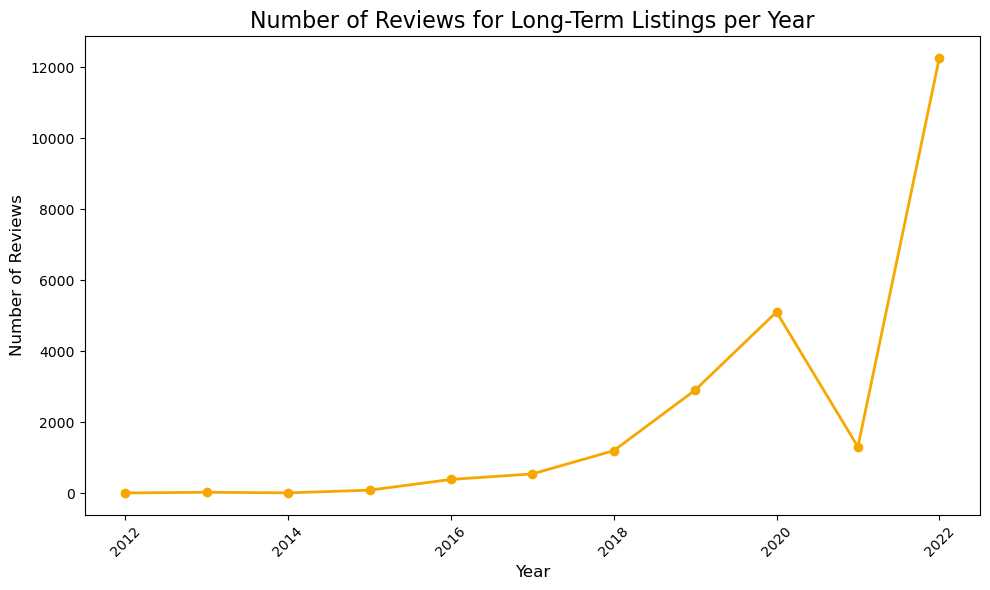

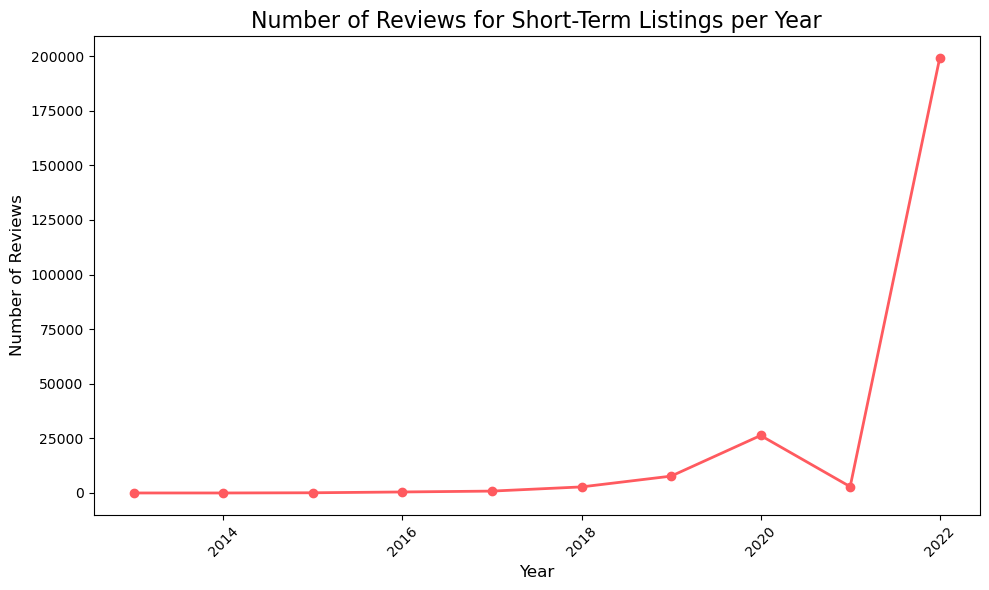

In [41]:
# Ensure the 'last_review' column is in datetime format
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

# Extract the year from 'last_review' (or other date-related column)
df['year'] = df['last_review'].dt.year

# Filter data for short-term and long-term listings
long_term_df = df[df['rental_category'] == 'Long-term']
short_term_df = df[df['rental_category'] == 'Short-term']

# Calculate the total number of reviews per year for long-term listings
reviews_long_term_yearly = long_term_df.groupby('year')['number_of_reviews'].sum()

# Calculate the total number of reviews per year for short-term listings
reviews_short_term_yearly = short_term_df.groupby('year')['number_of_reviews'].sum()

# Plotting for long-term listings
plt.figure(figsize=(10, 6))
reviews_long_term_yearly.plot(kind='line', color='#F6A800', marker='o', linewidth=2)
plt.title('Number of Reviews for Long-Term Listings per Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
reviews_short_term_yearly.plot(kind='line', color='#FF5A5F', marker='o', linewidth=2)
plt.title('Number of Reviews for Short-Term Listings per Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Both long-term and short-term listings demonstrate an overall upward trend in the number of reviews over the years, indicating growing activity within Bangkok’s rental market. A clear decline is visible in 2021, coinciding with the COVID-19 pandemic, when travel restrictions and reduced mobility led to a temporary slowdown across both segments.

Following this period, both categories recovered in 2022, though with different growth patterns. Short-term listings, which consistently record higher review volumes, experienced a sharper decline in 2021 but rebounded strongly afterward, with review counts that far exceed those of long-term listings. Long-term listings, in contrast, show a steadier yet less upward progression and a less pronounced—though still considerable—drop during the pandemic, reflecting a more stable trend with lower volatility.

Overall, the data highlights two distinct market behaviors: short-term rentals operate on a larger scale and react more quickly to external conditions, while long-term rentals advance more gradually and maintain steadier engagement levels. This understanding should guide hosts — both those operating short-term rentals within government regulations and those focusing on long-term rentals due to Hoteling or Condominium Act restrictions or by strategic choice — to evaluate which rental category best aligns with their business objectives, balancing growth potential with market stability.

##

### 2.  Neighbourhood Market Insights: Share and Activity of Short-Term and Long-Term Listings

This analysis examines the distribution and activity of Airbnb listings across different neighborhoods in Bangkok, comparing short-term and long-term rentals. It provides insights into which areas have higher listing concentration, engagement levels, and market share for each rental type, helping identify strategically valuable locations for hosts or investors aiming to optimize occupancy and performance.

<Figure size 1400x800 with 0 Axes>

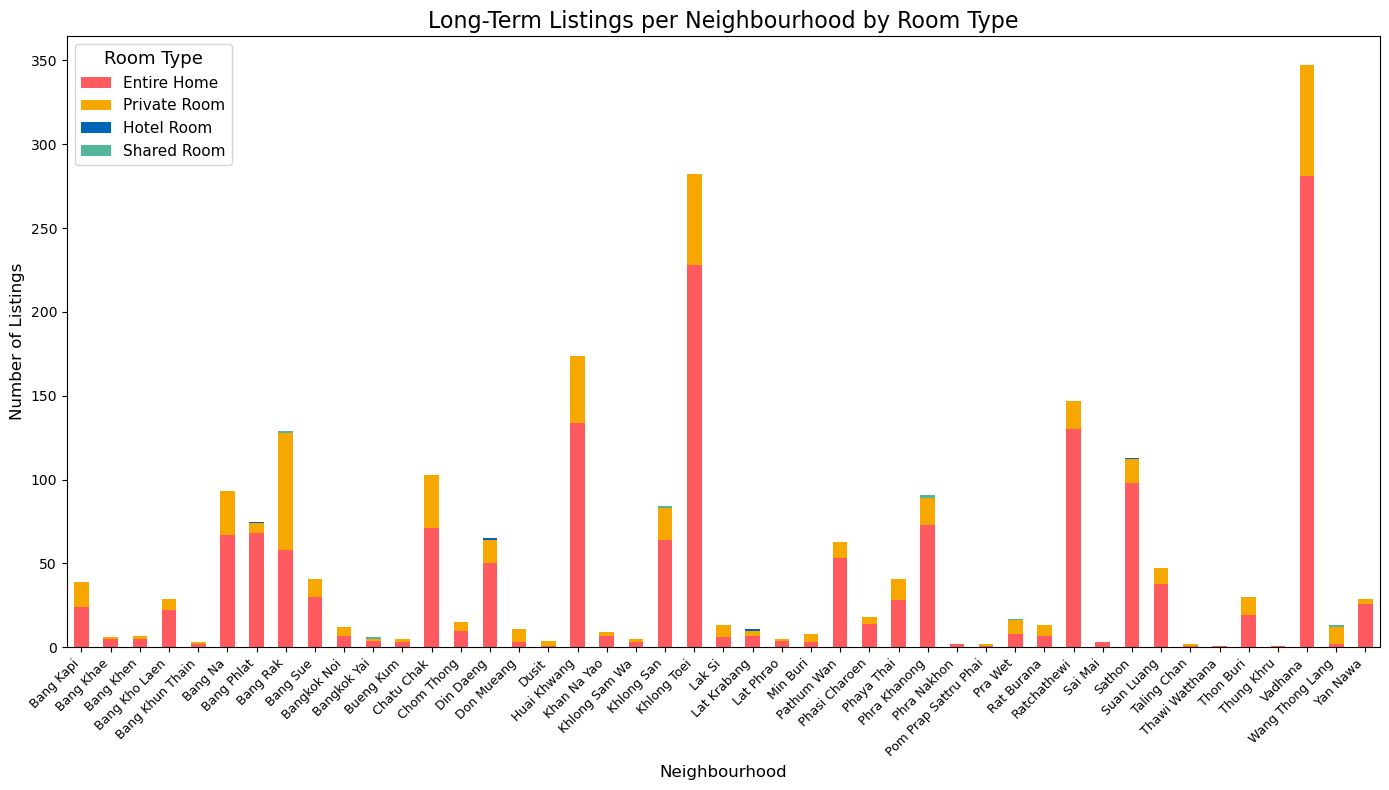

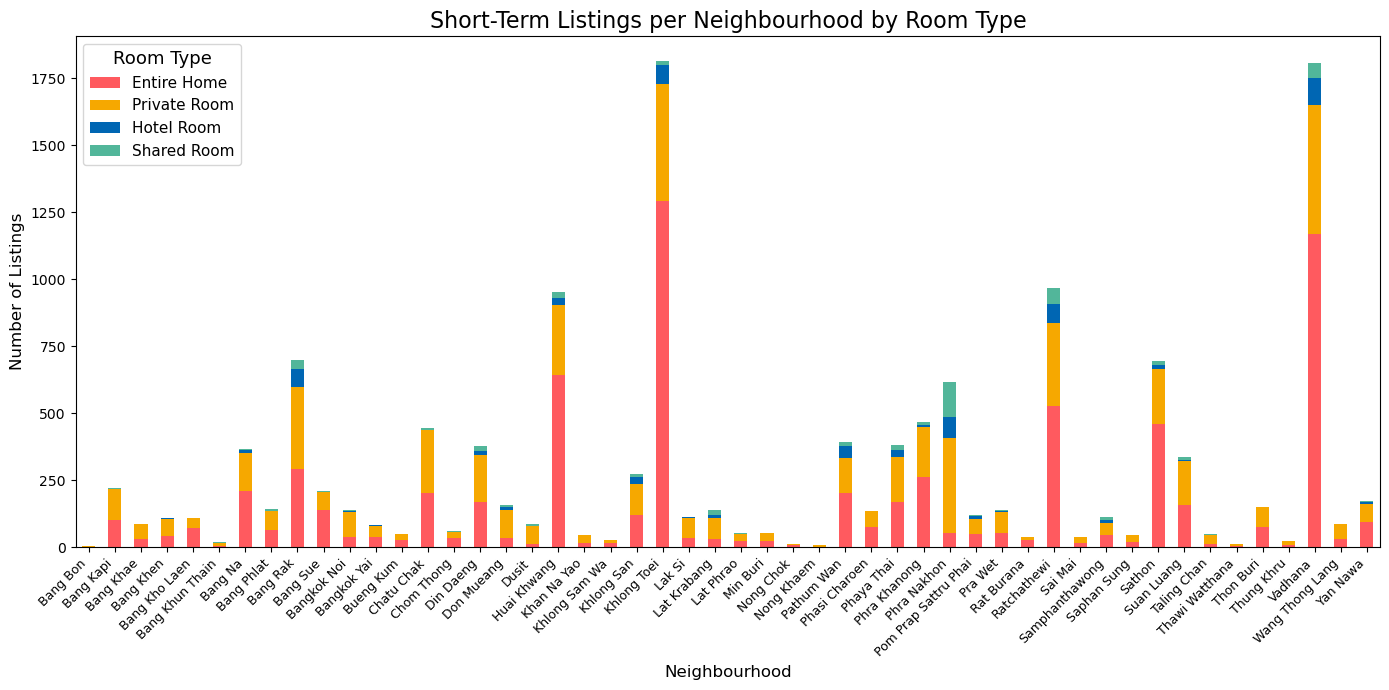

In [42]:
# Define Airbnb color palette
airbnb_colors = ['#FF5A5F', '#F6A800', '#0066B3', '#52B69A']  
airbnb_red = '#FF5A5F'
airbnb_yellow = '#F6A800'

# --- FILTER DATA ---
# Filter long-term and short-term listings
long_term_df = df[df['rental_category'] == 'Long-term']
short_term_df = df[df['rental_category'] == 'Short-term']

# Desired room type order
room_order = ['Entire home/apt', 'Private room', 'Hotel room', 'Shared room']

# --- LONG-TERM LISTINGS: Stacked Bar by Neighbourhood & Room Type ---
long_term_counts = long_term_df.groupby(['neighbourhood', 'room_type']).size().unstack(fill_value=0)
long_term_counts = long_term_counts[room_order]  # Reorder columns

plt.figure(figsize=(14, 8))
long_term_counts.plot(kind='bar', stacked=True, color=airbnb_colors, figsize=(14, 8))

plt.title('Long-Term Listings per Neighbourhood by Room Type', fontsize=16)
plt.xlabel('Neighbourhood', fontsize=12)
plt.ylabel('Number of Listings', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.legend(title='Room Type', title_fontsize=13, fontsize=11,
           labels=['Entire Home', 'Private Room', 'Hotel Room', 'Shared Room'],
           loc='upper left')
plt.tight_layout()
plt.show()

# --- SHORT-TERM LISTINGS: Stacked Bar by Neighbourhood & Room Type ---
short_term_counts = short_term_df.groupby(['neighbourhood', 'room_type']).size().unstack(fill_value=0)
short_term_counts = short_term_counts[room_order]  # Reorder columns

fig, ax = plt.subplots(figsize=(14, 7))
short_term_counts.plot(kind='bar', stacked=True, ax=ax, color=airbnb_colors)

ax.set_title('Short-Term Listings per Neighbourhood by Room Type', fontsize=16)
ax.set_xlabel('Neighbourhood', fontsize=12)
ax.set_ylabel('Number of Listings', fontsize=12)
ax.set_xticklabels(short_term_counts.index, rotation=45, ha='right', fontsize=9)
ax.legend(title='Room Type', title_fontsize=13, fontsize=11,
          labels=['Entire Home', 'Private Room', 'Hotel Room', 'Shared Room'],
          loc='upper left')
plt.tight_layout()
plt.show()

In both charts, “Entire Home” listings consistently represent the largest share, indicating that full-unit properties are the dominant offering for both long-term and short-term rentals. The short-term market shows a significantly higher overall volume, especially in Khlong Toei, Huai Khwang, Ratchathewi, Watthana, and Bang Rak, suggesting that these neighbourhoods are highly active for short-term stays due to their attractiveness to visitors or tourists. 

Interestingly, these same five neighbourhoods also appear among the top areas for long-term listings, showing their dual strength in accommodating both short-term and long-term demand. This pattern indicates that these locations have a diversified rental market, serving both temporary visitors and long-term tenants such as local residents, university students, or professionals working nearby. The overlap between both markets also suggests that these neighbourhoods are likely situated near Bangkok’s central business districts (CBD) and key tourist spots, making them strategically positioned for a wide range of rental needs. 

There are also several neighbourhoods — Nong Chok, Samphanthawong, Saphan Sung, Nong Khaem, and Bang Bon — that have no long-term listings, indicating a market exclusively concentrated on short-term rentals.

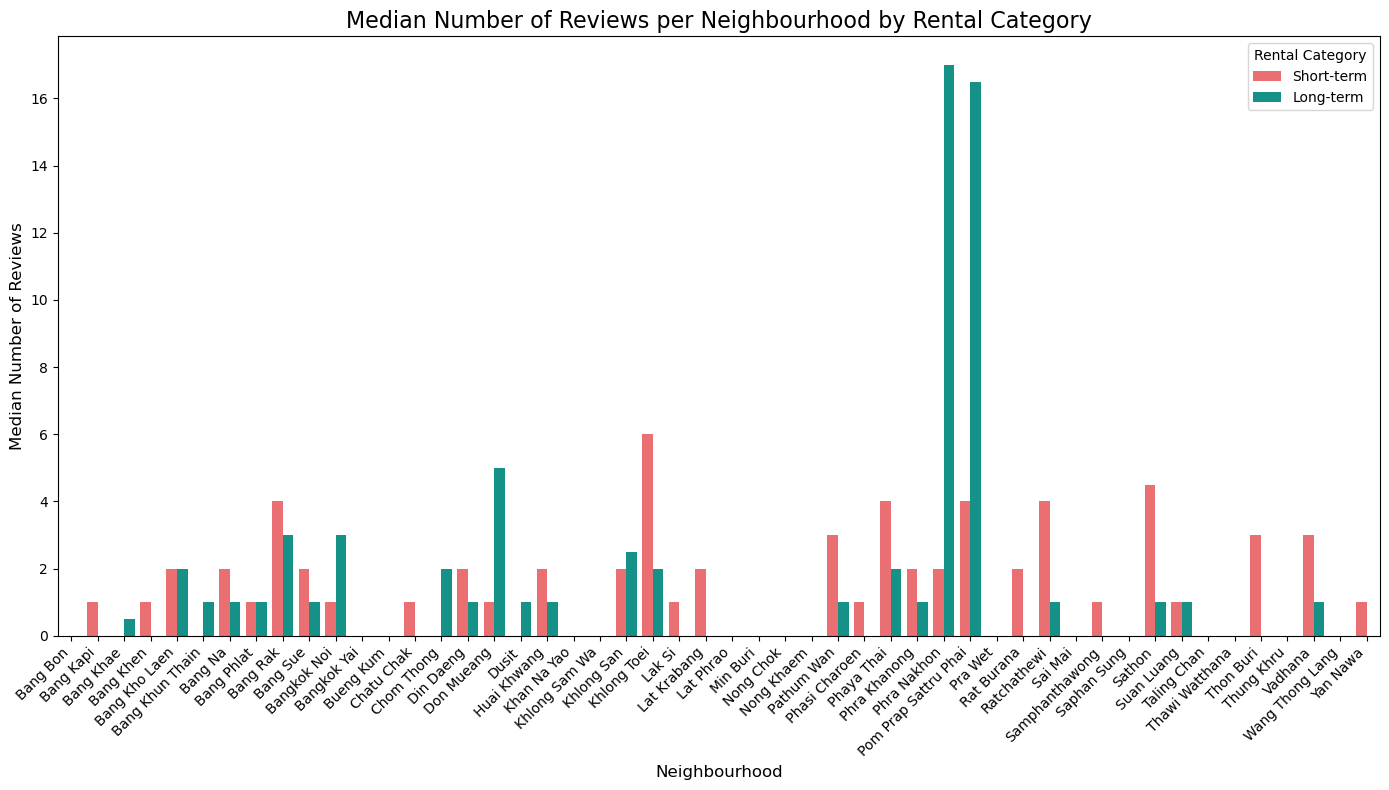

In [43]:
# Airbnb colors
airbnb_colors = ['#FF5A5F', '#00A699']  # Pink & Teal

# --- FILTER & CLEAN DATA ---
# Drop rows with missing critical values
df_clean = df.dropna(subset=['neighbourhood', 'rental_category', 'number_of_reviews'])

# Make sure number_of_reviews is numeric
df_clean['number_of_reviews'] = pd.to_numeric(df_clean['number_of_reviews'], errors='coerce')

# --- GROUPING ---
# Average number of reviews per neighbourhood & rental category
avg_reviews = (
    df_clean
    .groupby(['neighbourhood', 'rental_category'])
    .agg(avg_reviews=('number_of_reviews', 'median'))
    .reset_index()
)

# --- BAR PLOT ---
plt.figure(figsize=(14, 8))
sns.barplot(
    data=avg_reviews,
    x='neighbourhood',
    y='avg_reviews',
    hue='rental_category',
    palette=airbnb_colors
)

# --- AESTHETICS ---
plt.title("Median Number of Reviews per Neighbourhood by Rental Category", fontsize=16)
plt.xlabel("Neighbourhood", fontsize=12)
plt.ylabel("Median Number of Reviews", fontsize=12)
plt.xticks(short_term_counts.index, rotation=45, ha='right')
plt.legend(title='Rental Category')
plt.tight_layout()
plt.show()

The chart illustrates the median number of reviews across Bangkok neighbourhoods by rental category (short-term vs. long-term). Overall, short-term rentals tend to receive higher median reviews than long-term rentals, suggesting stronger guest activity and turnover typical of short-stay or tourism-driven markets.

Notably, several neighbourhoods such as Sathon, Phaya Thai, and Thon Buri exhibit high median reviews despite relatively low supply, indicating potential high-demand or underserved markets. In contrast, Watthana (Vadhana)—which has one of the highest listing supplies—shows lower median reviews, implying possible oversupply and market saturation in that area.

However, several neighbourhoods show distinctive patterns worth noting. For long-term rentals, Pom Prap Sattru Phai, Phra Wet, and Don Mueang exhibit notably high median reviews relative to their small listing supply, indicating strong potential demand in these areas. This also suggests that the long-term rental market in these neighbourhoods maintains sustained guest engagement or recurring occupancy, even with fewer overall listings.

These findings emphasize that while short-term rentals remain more active overall, market opportunities differ by neighbourhood. Hosts can use these insights to strategically align their listings—whether focusing on short-term rentals under regulatory compliance or long-term rentals driven by market adaptation or legal constraints—to maximize performance within Bangkok’s dynamic and regulated rental landscape.

##

### 3. Pricing Analysis: Comparative Patterns for Short-Term and Long-Term Rentals

This analysis explores the pricing patterns of Airbnb listings in Bangkok, comparing short-term and long-term rentals. It highlights differences in average prices, pricing distributions, and potential pricing strategies, providing insights for hosts and investors to optimize revenue while remaining competitive in each rental segment.

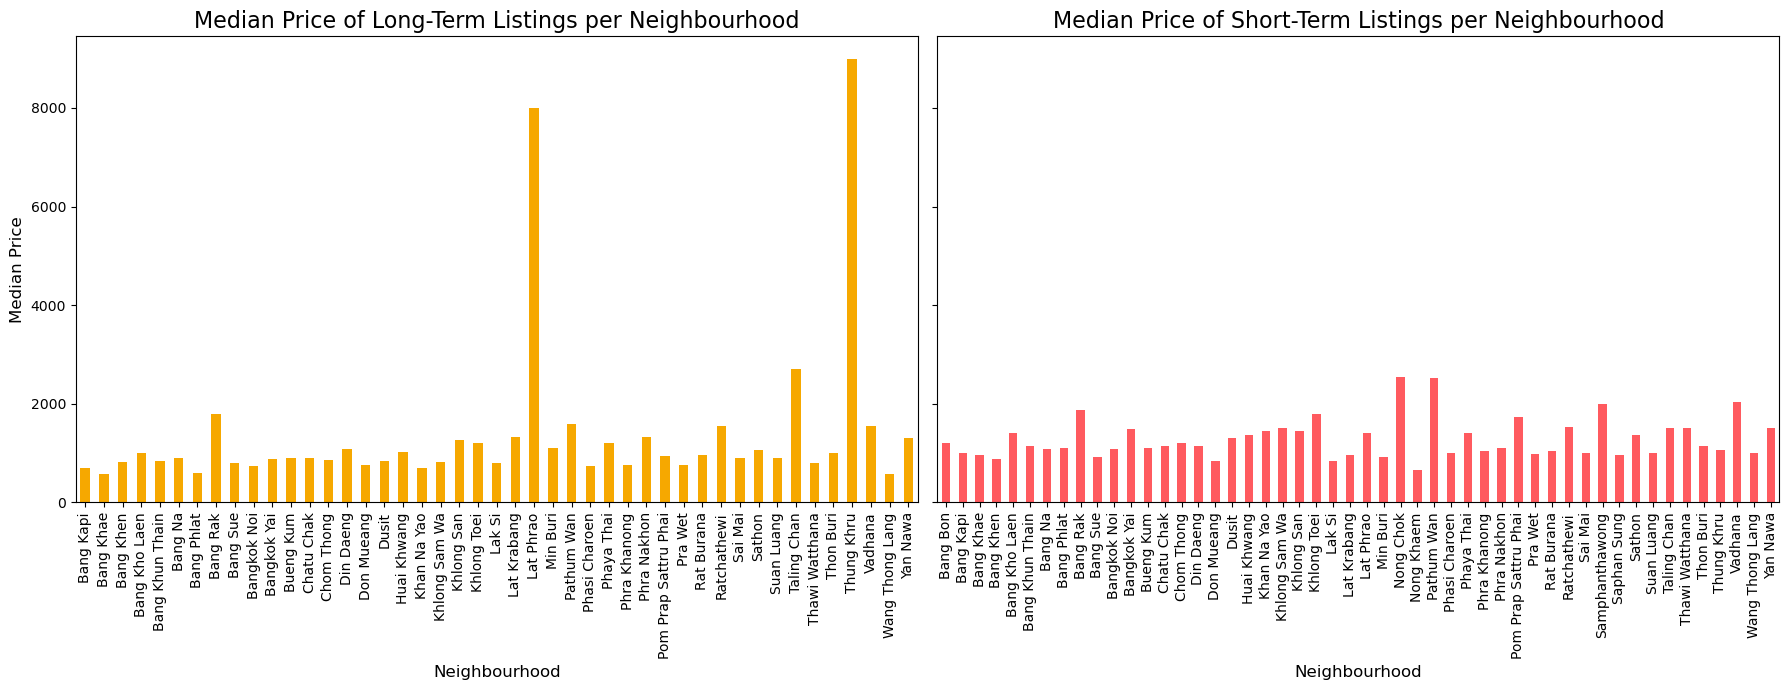

In [44]:
# Filter data for long-term and short-term listings
long_term_df = df[df['rental_category'] == 'Long-term']
short_term_df = df[df['rental_category'] == 'Short-term']

# Calculate the average price per neighbourhood for long-term listings
avg_price_long_term = long_term_df.groupby('neighbourhood')['price'].median()

# Calculate the average price per neighbourhood for short-term listings
avg_price_short_term = short_term_df.groupby('neighbourhood')['price'].median()

# Create two side-by-side charts
fig, axes = plt.subplots(1, 2, figsize=(18, 7), sharey=True)

# Plot for long-term listings (left chart, yellow color)
avg_price_long_term.plot(kind='bar', ax=axes[0], color='#F6A800', edgecolor='none')  # Yellow color for long-term
axes[0].set_title('Median Price of Long-Term Listings per Neighbourhood', fontsize=16)
axes[0].set_xlabel('Neighbourhood', fontsize=12)
axes[0].set_ylabel('Median Price', fontsize=12)
axes[0].tick_params(axis='x', rotation=90)  # Rotate x labels for readability

# Plot for short-term listings (right chart, light coral color)
avg_price_short_term.plot(kind='bar', ax=axes[1], color='#FF5A5F', edgecolor='none')  # Airbnb red for short-term
axes[1].set_title('Median Price of Short-Term Listings per Neighbourhood', fontsize=16)
axes[1].set_xlabel('Neighbourhood', fontsize=12)
axes[1].set_ylabel('Median Price', fontsize=12)
axes[1].tick_params(axis='x', rotation=90)  # Rotate x labels for readability

# Display the chart
plt.tight_layout()
plt.show()

The chart compares the median prices of long-term and short-term Airbnb listings across Bangkok’s neighbourhoods, revealing clear disparities and unique concentration patterns between the two segments.

For long-term rentals, neighbourhoods such as Lat Phrao, Thung Khru, and Taling Chan show significantly higher median prices compared to other areas. These spikes may suggest that long-term rental prices in these locations are influenced by factors such as property size, premium amenities, or higher-value neighbourhood characteristics rather than general market averages.

In contrast, short-term rentals display a much more consistent price distribution, with moderate variations across most neighbourhoods. This stability indicates a more uniform market dynamic, likely driven by tourism demand and short-stay expectations that standardize nightly rates.

Overall, the long-term market demonstrates higher price volatility and localized premium pricing, while the short-term market remains more balanced and predictable. This insight can help Airbnb hosts evaluate how their property’s price positioning aligns with neighbourhood-level trends—whether operating under compliant short-term rentals or focusing strategically on the long-term market in response to regulatory or market conditions.

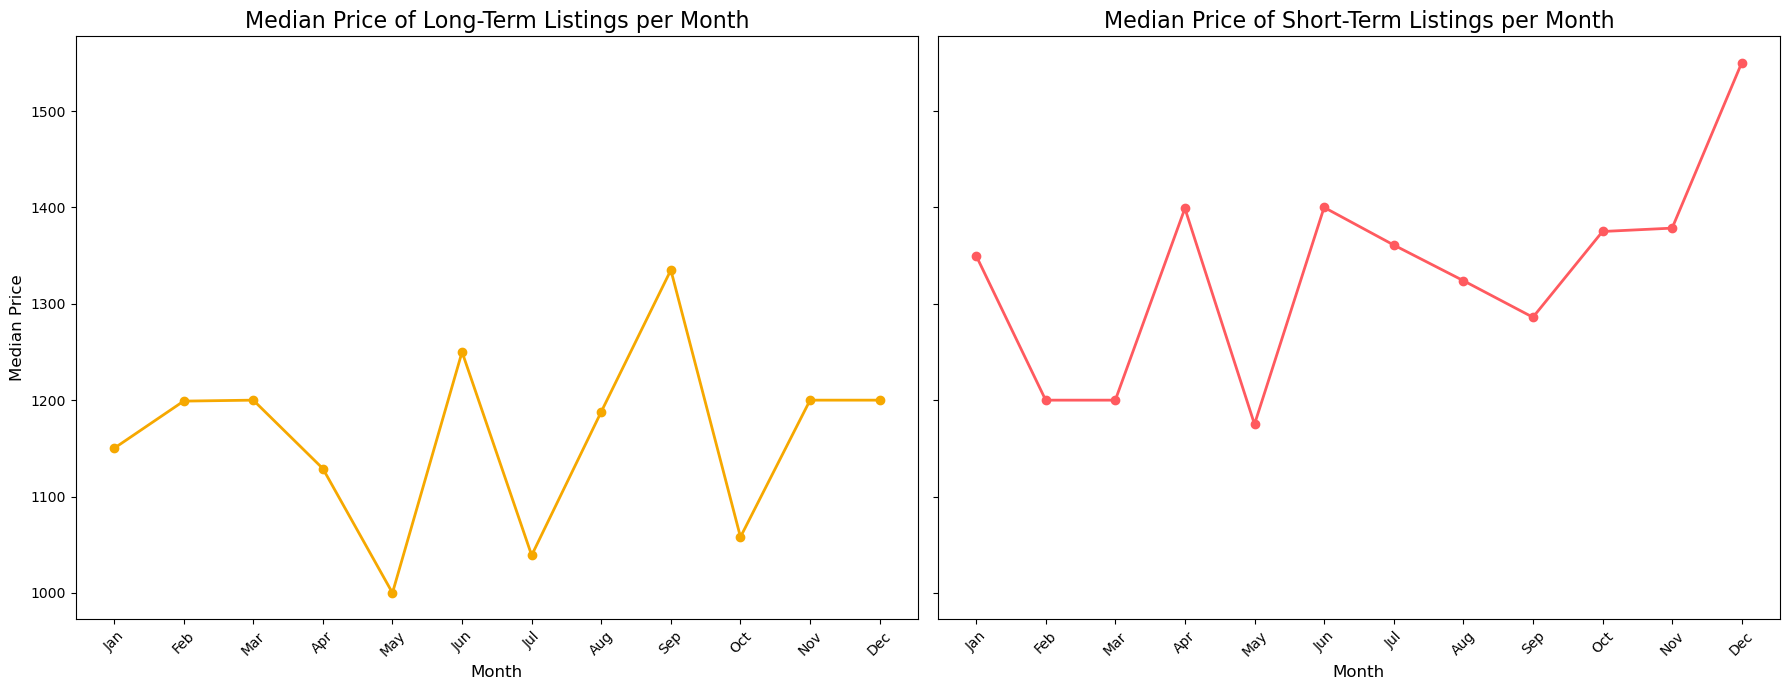

In [45]:
# Extract the month and year from 'last_review' (or other date-related column)
df['month'] = df['last_review'].dt.month

# Filter data for short-term and long-term listings
long_term_df = df[df['rental_category'] == 'Long-term']
short_term_df = df[df['rental_category'] == 'Short-term']

# Calculate the median price per month for long-term listings
avg_price_long_term_monthly = long_term_df.groupby('month')['price'].median()

# Calculate the median price per month for short-term listings
avg_price_short_term_monthly = short_term_df.groupby('month')['price'].median()

# Create two side-by-side line charts
fig, axes = plt.subplots(1, 2, figsize=(18, 7), sharey=True)

# Line chart for long-term listings (left chart, yellow color)
avg_price_long_term_monthly.plot(kind='line', ax=axes[0], color='#F6A800', marker='o', linewidth=2)
axes[0].set_title('Median Price of Long-Term Listings per Month', fontsize=16)
axes[0].set_xlabel('Month', fontsize=12)
axes[0].set_ylabel('Median Price', fontsize=12)
axes[0].set_xticks(range(1, 13))  # Set x-ticks for 12 months (starting from 1)
axes[0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
axes[0].tick_params(axis='x', rotation=45)  # Rotate x labels for readability

# Line chart for short-term listings (right chart, Airbnb Red color)
avg_price_short_term_monthly.plot(kind='line', ax=axes[1], color='#FF5A5F', marker='o', linewidth=2)
axes[1].set_title('Median Price of Short-Term Listings per Month', fontsize=16)
axes[1].set_xlabel('Month', fontsize=12)
axes[1].set_ylabel('Median Price', fontsize=12)
axes[1].set_xticks(range(1, 13))  # Set x-ticks for 12 months (starting from 1)
axes[1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
axes[1].tick_params(axis='x', rotation=45)  # Rotate x labels for readability

# Display the chart
plt.tight_layout()
plt.show()

The data shows that both long-term and short-term listings experience month-to-month price fluctuations. While short-term listings fluctuate more noticeably — particularly showing a gradual increase toward the end of the year — long-term listings appear to begin the year at relatively stable levels, followed by a period of mid-year variation before returning to prices similar to those at the start of the year in the final two months.

In the long-term segment, prices may reflect limited responsiveness to short-term market dynamics. The overall pattern suggests that while some mid-year deviations occur, pricing tends to revert to a steady range, possibly due to the influence of fixed lease terms or lower frequency of rate adjustments. This may indicate that long-term rental prices are shaped more by structural or contractual factors than by immediate demand shifts.

Short-term listings, by contrast, show clearer fluctuations, with a gradual upward movement in the final quarter that may correspond with tourism-driven demand peaks, such as during the holiday season. This suggests that short-term hosts could be more reactive to market cycles, adjusting prices in response to changes in visitor activity.

This understanding should guide hosts — both those operating short-term rentals within government regulations and those focusing on long-term rentals due to Hoteling or Condominium Act restrictions or by strategic choice — to implement dynamic pricing strategies that adjust rates based on anticipated demand, optimizing revenue opportunities within the existing listing market composition.

##

### 4. Language and Keyword Influence on Listing Performance: Short-Term vs Long-Term Listings in Bangkok

This analysis investigates how listing names and description keywords impact the performance of Airbnb listings, comparing short-term and long-term rentals in Bangkok. By examining the role of language (English vs. Non-English) and specific keywords, it identifies patterns that correlate with higher engagement, helping hosts and investors craft optimized listing content to attract more guests and improve overall performance.

#### 4.1 English vs Non-English

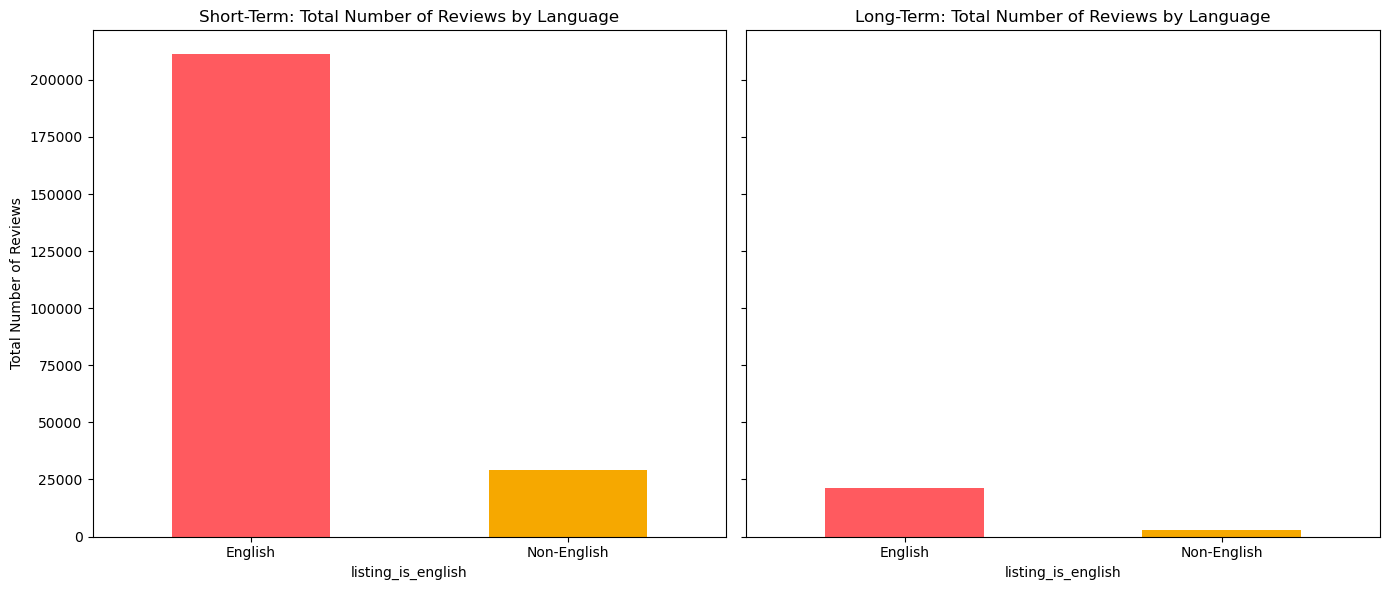

In [46]:
# Filter by rental category
short_term_df = df[df['rental_category'] == 'Short-term']
long_term_df = df[df['rental_category'] == 'Long-term']

# Group and calculate average reviews
short_term_avg = short_term_df.groupby('listing_is_english')['number_of_reviews'].sum()
long_term_avg = long_term_df.groupby('listing_is_english')['number_of_reviews'].sum()

# Airbnb colors
airbnb_red = '#FF5A5F'
airbnb_yellow = '#F6A800'
colors = [airbnb_red, airbnb_yellow]

# Create side-by-side bar charts
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Short-Term
short_term_avg.plot(kind='bar', color=colors, ax=axes[0])
axes[0].set_title('Short-Term: Total Number of Reviews by Language')
axes[0].set_ylabel('Total Number of Reviews')
axes[0].set_xticklabels(['English', 'Non-English'], rotation=0)

# Long-Term
long_term_avg.plot(kind='bar', color=colors, ax=axes[1])
axes[1].set_title('Long-Term: Total Number of Reviews by Language')
axes[1].set_ylabel('Total Number of Reviews')
axes[1].set_xticklabels(['English', 'Non-English'], rotation=0)

plt.tight_layout()
plt.show()

The chart illustrates the impact of listing language on guest engagement, measured through the total number of reviews for both short-term and long-term rentals in Bangkok.

For short-term rentals, English-language listings overwhelmingly dominate, accounting for a substantially higher total number of reviews compared to Non-English listings. This reflects Airbnb’s strong international user base and the greater visibility of English listings to global travelers, which likely results in higher booking volumes and guest interactions.

In the long-term rental segment, the same trend is observed, though at a smaller scale. English listings still record far more total reviews than Non-English ones, suggesting that language accessibility continues to influence engagement even in markets oriented toward extended stays.

Overall, the data indicates that English-language listings capture the majority of guest activity across both segments, emphasizing the importance of language visibility for hosts aiming to reach broader audiences and maintain competitiveness in Bangkok’s multicultural and tourism-driven environment.

#### 4.2 Keyword Impact

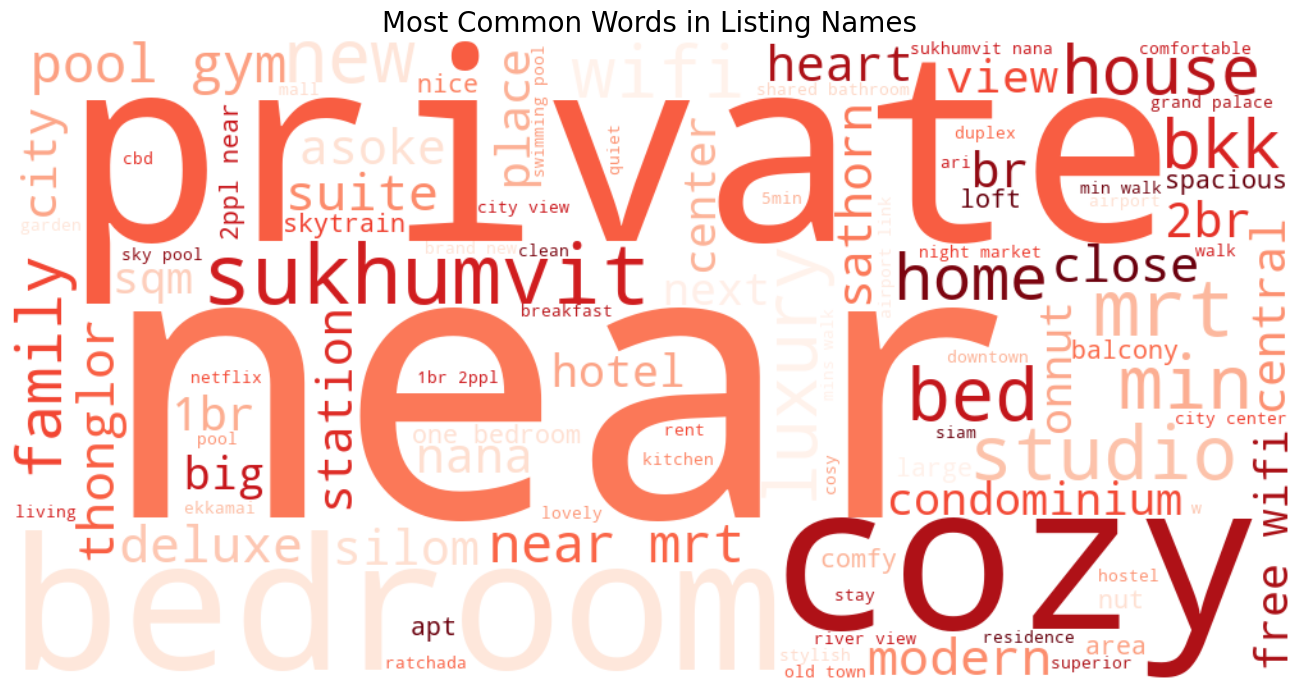

In [47]:

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Gabungkan semua teks dari kolom nama listing (dijadikan lowercase)
listing_names = ' '.join(df['name'].dropna().str.lower().astype(str))

# Hapus kata-kata umum (custom stopwords)
custom_stopwords = set(STOPWORDS)
custom_stopwords.update([
    'bangkok', 'room', 'apartment', 'condo', 'bts',
    'the', 'with', 'and', 'in', 'to', 'of', 'for', 'at'
])

# Buat WordCloud
wordcloud = WordCloud(
    width=1000,
    height=500,
    background_color='white',
    stopwords=custom_stopwords,
    colormap='Reds',  # Sesuai dengan tema Airbnb
    max_words=100
).generate(listing_names)

# Tampilkan WordCloud
plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Listing Names", fontsize=20)
plt.tight_layout()
plt.show()

From this wordcloud, we can get a high-level overview of the keywords that most frequently appear in Airbnb listing titles in Bangkok. Our next step is to focus on the keywords that reveal meaningful differences in characteristics and performance between short-term and long-term rentals. The top impactful keywords we’ve identified are: mrt, wifi, pool, gym, bedroom, br, luxury, modern, cozy, home, near, view, and central. Each of these terms carries a distinct signal to potential guests: some drive immediate short-term bookings by highlighting convenience or emotional appeal, while others resonate more with long-term renters seeking comfort, functionality, and a sense of home.

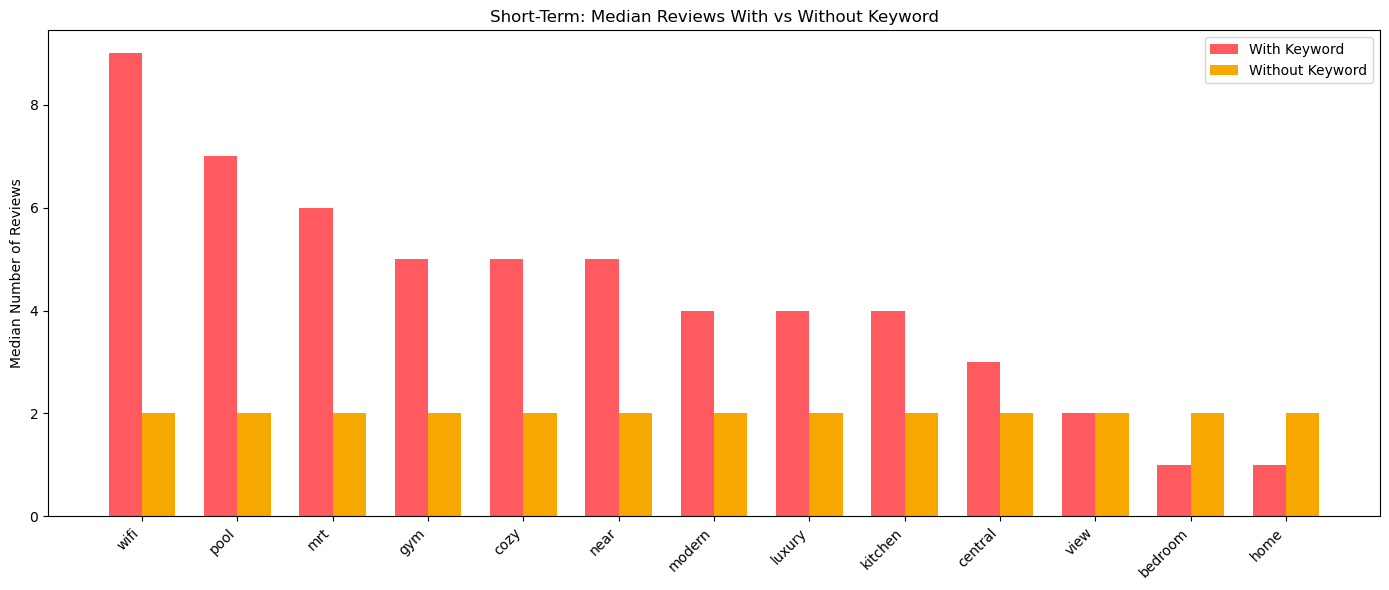

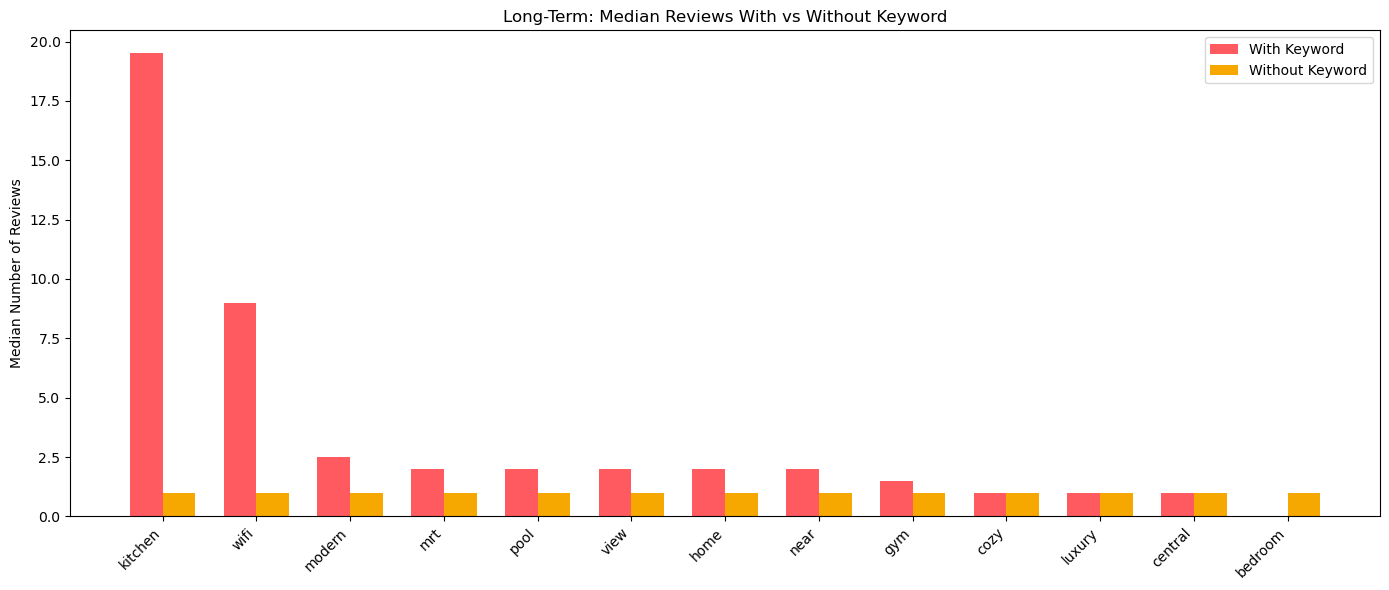

In [48]:
# Pastikan kolom 'name' tidak kosong dan semua huruf kecil
df['name'] = df['name'].fillna('').str.lower()

# Daftar kata kunci yang akan dianalisis
keywords = ['mrt', 'wifi', 'pool', 'gym', 'bedroom', 'kitchen', 
            'luxury', 'modern', 'cozy', 'home', 'near', 'view', 'central']

# Pisahkan berdasarkan kategori sewa
short_term_df = df[df['rental_category'] == 'Short-term'].copy()
long_term_df = df[df['rental_category'] == 'Long-term'].copy()

# Kontainer hasil analisis
short_results = []
long_results = []

# Loop untuk setiap keyword
for kw in keywords:
    # Gunakan regex \b untuk mencocokkan kata utuh (bukan bagian dari kata lain)
    pattern = rf'\b{re.escape(kw)}\b'
    
    # Short-term 
    short_has_kw = short_term_df['name'].str.contains(pattern, regex=True, na=False)
    short_with_reviews = short_term_df[short_has_kw]['number_of_reviews']
    short_without_reviews = short_term_df[~short_has_kw]['number_of_reviews']

    short_results.append({
        'keyword': kw,
        'With Keyword': short_with_reviews.median(),
        'Without Keyword': short_without_reviews.median(),
        'Diff': short_with_reviews.median() - short_without_reviews.median()
    })

    # Long-term 
    long_has_kw = long_term_df['name'].str.contains(pattern, regex=True, na=False)
    long_with_reviews = long_term_df[long_has_kw]['number_of_reviews']
    long_without_reviews = long_term_df[~long_has_kw]['number_of_reviews']

    long_results.append({
        'keyword': kw,
        'With Keyword': long_with_reviews.median(),
        'Without Keyword': long_without_reviews.median(),
        'Diff': long_with_reviews.median() - long_without_reviews.median()
    })

# Buat DataFrame hasil
short_df = pd.DataFrame(short_results).fillna(0)
long_df = pd.DataFrame(long_results).fillna(0)

# Urutkan berdasarkan dampak (Diff) tertinggi
short_df = short_df.sort_values('Diff', ascending=False)
long_df = long_df.sort_values('Diff', ascending=False)

# ============================================
# Visualisasi 1: Short-term keyword impact
# ============================================

fig1, ax1 = plt.subplots(figsize=(14, 6))
x = range(len(short_df))
bar_width = 0.35

ax1.bar([i - bar_width/2 for i in x], short_df['With Keyword'], width=bar_width, color='#FF5A5F', label='With Keyword')
ax1.bar([i + bar_width/2 for i in x], short_df['Without Keyword'], width=bar_width, color='#F6A800', label='Without Keyword')

ax1.set_xticks(x)
ax1.set_xticklabels(short_df['keyword'], rotation=45, ha='right')
ax1.set_ylabel('Median Number of Reviews')
ax1.set_title('Short-Term: Median Reviews With vs Without Keyword')
ax1.legend()
plt.tight_layout()
plt.show()

# ============================================
# Visualisasi 2: Long-term keyword impact
# ============================================

fig2, ax2 = plt.subplots(figsize=(14, 6))
x = range(len(long_df))

ax2.bar([i - bar_width/2 for i in x], long_df['With Keyword'], width=bar_width, color='#FF5A5F', label='With Keyword')
ax2.bar([i + bar_width/2 for i in x], long_df['Without Keyword'], width=bar_width, color='#F6A800', label='Without Keyword')

ax2.set_xticks(x)
ax2.set_xticklabels(long_df['keyword'], rotation=45, ha='right')
ax2.set_ylabel('Median Number of Reviews')
ax2.set_title('Long-Term: Median Reviews With vs Without Keyword')
ax2.legend()
plt.tight_layout()
plt.show()

The analysis highlights how keyword usage in listing titles influences guest engagement across short-term and long-term Airbnb rentals in Bangkok, measured through the median number of reviews as a proxy for listing performance.

In the short-term market, guests show stronger engagement with listings that emphasize convenience, accessibility, and essential amenities. Keywords such as “wifi,” “pool,” “mrt,” “gym,” and “cozy” consistently correlate with higher review performance. This pattern suggests that short-stay travelers tend to value connectivity, comfort, and ease of mobility — features that enhance immediate usability during brief visits.

Conversely, listings using more residential or personal tones, such as “home” and “bedroom,” exhibit lower engagement levels. These terms may underplay the sense of novelty and convenience that short-term guests typically seek, indicating that an overly “homelike” framing may be less effective for transient audiences.

In contrast, the long-term rental market favors keywords that communicate livability, functionality, and everyday comfort. Terms such as “kitchen,” “wifi,” and “modern” are associated with higher review medians, indicating stronger guest engagement. These keywords signal readiness for extended stays, where practical amenities and a sense of permanence matter more than luxury or location branding.

Meanwhile, aspirational terms like “pool,” “gym,” “luxury,” and “central” show minimal correlation with review performance, suggesting that long-term guests prioritize essential, home-like features over leisure-oriented attributes.

Ultimately, this understanding enables hosts — regardless of market segment — to strategically tailor their listing titles with the most effective keywords, enhancing both visibility and guest engagement performance in an increasingly competitive environment.

##

### 5. "Sweet Spot" Minimum Nights Analysis: Maximizing Review Performance for Short-Term and Long-Term Rentals

This analysis examines the relationship between minimum night requirements and review performance for Airbnb listings, comparing short-term and long-term rentals. By identifying the optimal range of minimum stays that maximize engagement, it provides actionable insights for hosts and investors to adjust booking policies and enhance listing attractiveness without sacrificing occupancy.

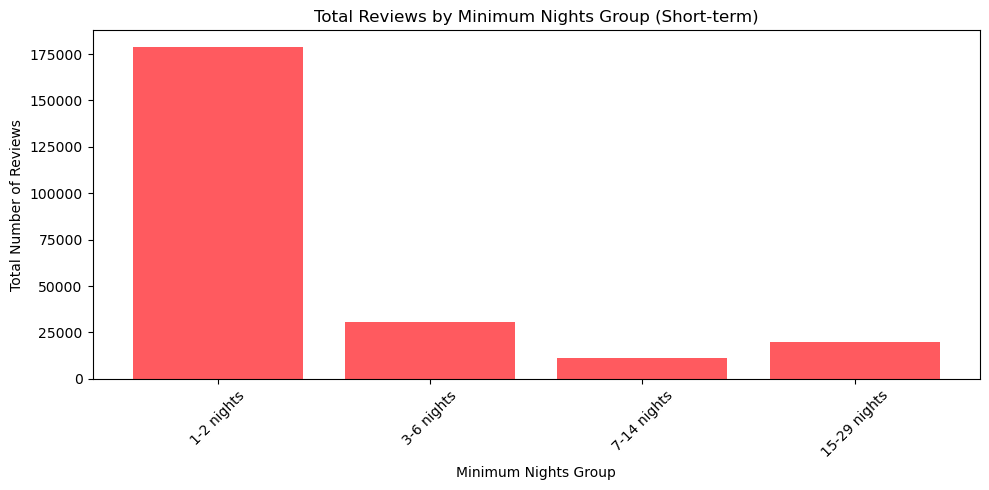

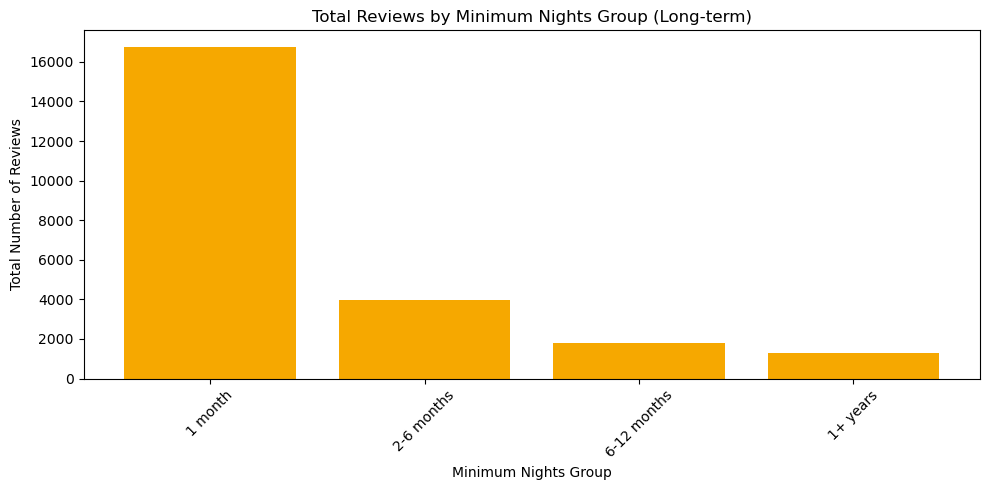

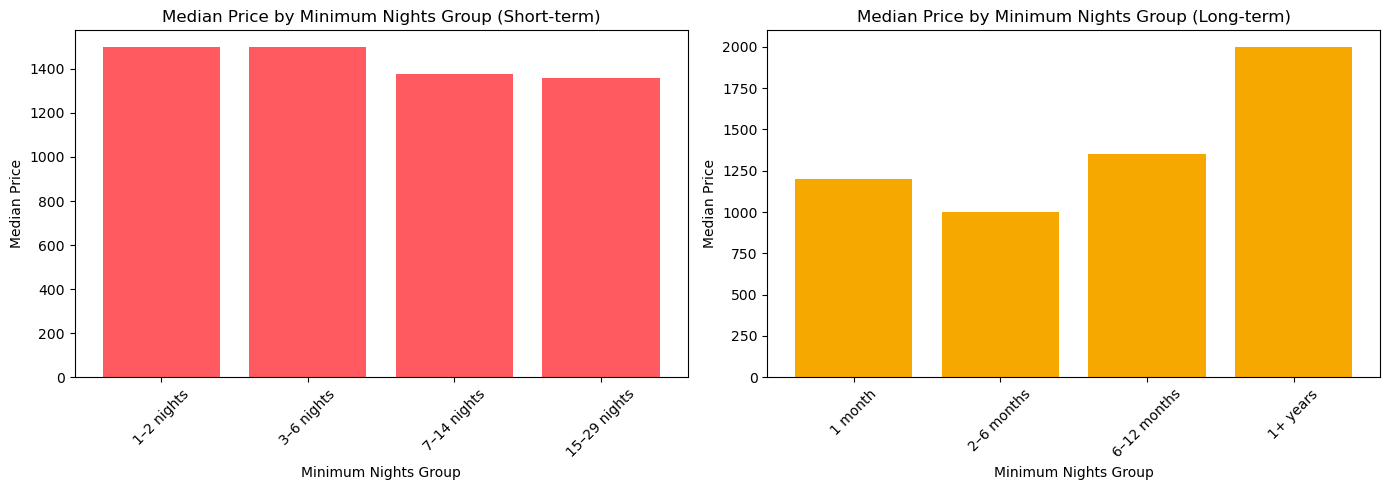

In [50]:
def categorize_min_nights(row):
    nights = row['minimum_nights']
    if row['rental_category'] == 'Short-term':
        if nights <= 2:
            return '1-2 nights'
        elif nights <= 6:
            return '3-6 nights'
        elif nights <= 14:
            return '7-14 nights'
        elif nights <= 29:
            return '15-29 nights'
        else:
            return '30+ nights (Short)'
    elif row['rental_category'] == 'Long-term':
        if 30 <= nights <= 59:
            return '1 month'
        elif 60 <= nights <= 179:
            return '2-6 months'  # digabung
        elif 180 <= nights <= 364:
            return '6-12 months'
        else:
            return '1+ years'


df['min_nights_group'] = df.apply(categorize_min_nights, axis=1)


grouped = df.groupby(['rental_category', 'min_nights_group'])['number_of_reviews'].sum().reset_index()


short_term_order = ['1-2 nights', '3-6 nights', '7-14 nights', '15-29 nights', '30+ nights (Short)']
short_df = grouped[grouped['rental_category'] == 'Short-term']
short_df = short_df.set_index('min_nights_group').reindex(short_term_order).reset_index()

plt.figure(figsize=(10, 5))
plt.bar(short_df['min_nights_group'], short_df['number_of_reviews'], color='#FF5A5F')
plt.title('Total Reviews by Minimum Nights Group (Short-term)')
plt.ylabel('Total Number of Reviews')
plt.xlabel('Minimum Nights Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

long_term_order = ['1 month', '2-6 months', '6-12 months', '1+ years']
long_df = grouped[grouped['rental_category'] == 'Long-term']
long_df = long_df.set_index('min_nights_group').reindex(long_term_order).reset_index()

plt.figure(figsize=(10, 5))
plt.bar(long_df['min_nights_group'], long_df['number_of_reviews'], color='#F6A800')
plt.title('Total Reviews by Minimum Nights Group (Long-term)')
plt.ylabel('Total Number of Reviews')
plt.xlabel('Minimum Nights Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['minimum_nights'] = pd.to_numeric(df['minimum_nights'], errors='coerce')
df['rental_category'] = df['rental_category'].astype(str)


def categorize_short_term(nights):
    if nights <= 2:
        return '1–2 nights'
    elif nights <= 6:
        return '3–6 nights'
    elif nights <= 14:
        return '7–14 nights'
    elif nights <= 29:
        return '15–29 nights'
    else:
        return None  

def categorize_long_term(nights):
    if nights <= 30:
        return '1 month'
    elif nights <= 180:
        return '2–6 months'
    elif nights <= 365:
        return '6–12 months'
    else:
        return '1+ years'


short_term_df = df[df['rental_category'] == 'Short-term'].copy()
long_term_df = df[df['rental_category'] == 'Long-term'].copy()

short_term_df['min_night_group'] = short_term_df['minimum_nights'].apply(categorize_short_term)
long_term_df['min_night_group'] = long_term_df['minimum_nights'].apply(categorize_long_term)


short_order = ['1–2 nights', '3–6 nights', '7–14 nights', '15–29 nights']
long_order = ['1 month', '2–6 months', '6–12 months', '1+ years']

short_term_df['min_night_group'] = pd.Categorical(short_term_df['min_night_group'], categories=short_order, ordered=True)
long_term_df['min_night_group'] = pd.Categorical(long_term_df['min_night_group'], categories=long_order, ordered=True)


short_median_price = short_term_df.groupby('min_night_group')['price'].median().reset_index()
long_median_price = long_term_df.groupby('min_night_group')['price'].median().reset_index()


fig, ax = plt.subplots(1, 2, figsize=(14, 5))

ax[0].bar(short_median_price['min_night_group'], short_median_price['price'], color='#FF5A5F')
ax[0].set_title('Median Price by Minimum Nights Group (Short-term)')
ax[0].set_ylabel('Median Price')
ax[0].set_xlabel('Minimum Nights Group')
ax[0].tick_params(axis='x', rotation=45)

ax[1].bar(long_median_price['min_night_group'], long_median_price['price'], color='#F6A800')
ax[1].set_title('Median Price by Minimum Nights Group (Long-term)')
ax[1].set_ylabel('Median Price')
ax[1].set_xlabel('Minimum Nights Group')
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

The data reveals distinct duration-based patterns that influence both review activity and pricing behavior within Bangkok’s rental market. These trends underscore how minimum stay policies shape guest engagement and value positioning across short-term and long-term listings.

In the short-term segment, listings with 1–2 nights minimum stays dominate in total review counts, reflecting high booking frequency and rapid guest turnover typical of transient travelers. Review activity declines noticeably for stays exceeding one week, indicating that longer short-term bookings generate fewer opportunities for guest feedback due to reduced booking cycles. When viewed alongside pricing, median prices remain relatively stable across short-term durations — with 1–2 nights and 3–6 nights groups showing comparable levels, and a slight decline for 7–14 nights and 15–29 nights. This suggests that hosts balance pricing across short durations to maintain competitiveness, occasionally applying modest discounts to encourage longer occupancy and reduce operational gaps.

In the long-term segment, listings with a one-month minimum stay achieve the highest review totals, marking this duration as the most active and engaged range among extended rentals. Review activity decreases steadily as the minimum stay lengthens beyond six months, aligning with the reduced booking frequency inherent in long-term commitments. Pricing patterns in this segment, however, show the opposite trajectory: median prices rise progressively with duration — starting moderately for one-month listings, dipping slightly for 2–6 months, then increasing for 6–12 months and 1+ year rentals. This indicates a value-based pricing approach, where hosts reward medium-term commitments with discounts while positioning year-long leases as premium offerings tied to stability and predictable occupancy.

Taken together, these findings show that review engagement and pricing follow different but complementary dynamics across durations — where short-term listings prioritize turnover and accessibility, while long-term listings emphasize stability and value appreciation over time.
This understanding should guide hosts — whether operating in the short-term or long-term market — to identify the optimal minimum stay duration that balances guest engagement, operational efficiency, and pricing competitiveness.

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Strategy Recommendations

### Strategy for Short-Term Rental Hosts

**1. Highlight Convenience & Location-Based Keywords**
Continue emphasizing accessibility-driven keywords such as “central,” “MRT,” “view,” and “cozy.” These correlate strongly with higher review engagement among short-term guests who prioritize proximity, mobility, and immediate comfort. Avoid overly domestic words like “home” or “bedroom,” which underperform for transient travelers.

**2. Optimize Minimum Stay for High-Turnover Efficiency**
Listings with 1–2 nights minimum stays attract the highest total reviews, showing that frequent turnover drives stronger guest engagement. Maintaining this low minimum enhances visibility and aligns with the dominant booking pattern in Bangkok’s short-term market.

**3. Leverage Underserved High-Performance Areas**
Neighbourhoods such as Sathon, Phaya Thai, and Thon Buri combine high review medians with relatively limited supply, indicating strong market potential with lower competition. In contrast, areas like Watthana (Vadhana) exhibit possible oversupply and weaker review performance — suggesting hosts may achieve higher returns by targeting less saturated neighbourhoods.

**4. Maintain Competitive but Stable Pricing**
Short-term median prices remain relatively consistent across stay durations, reflecting a balanced market structure. Hosts can sustain competitiveness by applying moderate discounts for weekly stays (7–14 nights) while preserving base rates for 1–6-night bookings to maximize turnover.

**5. Apply Dynamic and Seasonal Pricing Adjustments**
Short-term prices exhibit noticeable end-of-year increases, coinciding with tourism peaks. Hosts should leverage dynamic pricing tools to anticipate these cycles and optimize rates, particularly during Bangkok’s high-travel months (November–January).

### Strategy for Long-Term Rental Hosts

**1. Emphasize Livability, Functionality, and Comfort**
Keywords like “kitchen,” “wifi,” and “modern” consistently enhance review performance for long-term listings. Highlight these features to appeal to professionals, digital nomads, and expatriates who value practicality over luxury.

**2. Set a One-Month Minimum Stay as the Optimal Duration**
Listings with a one-month minimum achieve the highest engagement while satisfying regulatory compliance under Thailand’s Hotel and Condominium Acts. Longer minimums (6–12 months or more) reduce booking turnover and review volume, limiting visibility despite higher pricing.

**3. Focus on High-Potential Undersupplied Neighbourhoods**
Neighbourhoods like Pom Prap Sattru Phai, Phra Wet, and Don Mueang exhibit strong potential demand — with high review medians despite limited listing supply. These areas may represent prime opportunities for long-term investment or repositioning existing properties.

**4. Use Tiered Pricing to Reflect Commitment Value**
Pricing trends show that long-term listings for 6–12 months or 1+ years command higher median prices, suggesting that hosts can position longer commitments as premium offerings tied to security and stability. Maintain moderate prices for 1–3 month listings to attract flexible tenants while keeping occupancy consistent.

**5. Target Stable Demand Zones for Sustained Occupancy**
Areas such as Phaya Thai and Pathum Wan exhibit balanced pricing and consistent review activity, making them ideal for steady long-term operations.

### Strategy for Both Short-Term & Long-Term Hosts

**1. Use English as the Default Listing Language**
Across both markets, English-language listings dominate engagement metrics — generating far more reviews and visibility than non-English ones. This highlights the importance of accessibility for Bangkok’s global audience and Airbnb’s international traveler base.

**2. Feature “Wifi” Prominently in the Listing Name and Amenities**
“Wifi” remains the most influential keyword across both markets, directly linked to higher engagement levels. Explicitly include it in the title and ensure it is highlighted as a key amenity.

**3. Offer “Entire Home” Listings When Possible**
Both markets overwhelmingly favor full-unit rentals. Providing an “entire home” option enhances privacy and flexibility — major factors for both tourists and long-stay tenants.

**4. Align Pricing Strategies with Market Behavior**
Short-term prices fluctuate with seasonal tourism demand, while long-term prices remain steadier and structurally influenced by contract durations. Hosts should adopt flexible, data-driven pricing strategies tailored to their listing type — dynamic and reactive for short-term; tiered and stable for long-term.

**5. Position Properties in Overlapping High-Demand Districts**
Neighbourhoods such as Khlong Toei, Huai Khwang, Ratchathewi, and Bang Rak show strong performance in both segments, making them strategic zones for hybrid operations or dual-purpose listings (short-term compliant + long-term adaptable).

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Conclusion

This analysis emphasizes the importance of a well-informed strategy for managing Airbnb listings in Bangkok. By distinguishing the unique characteristics of short-term and long-term rental markets, identifying high-potential neighborhoods, and utilizing effective keywords and language, hosts can enhance their listing performance on the Market. Applying optimal minimum stay requirements, highlighting essential amenities, and employing dynamic pricing techniques are crucial for attracting guests and maximizing potential revenue. These findings provide actionable recommendations for hosts to successfully navigate regulatory challenges while tapping into market opportunities. By staying flexible and continually optimizing their strategies, hosts can maintain a competitive position and achieve sustained success in Bangkok’s vibrant rental market.